# Notebook to generate plots 

## Discharge characteristics

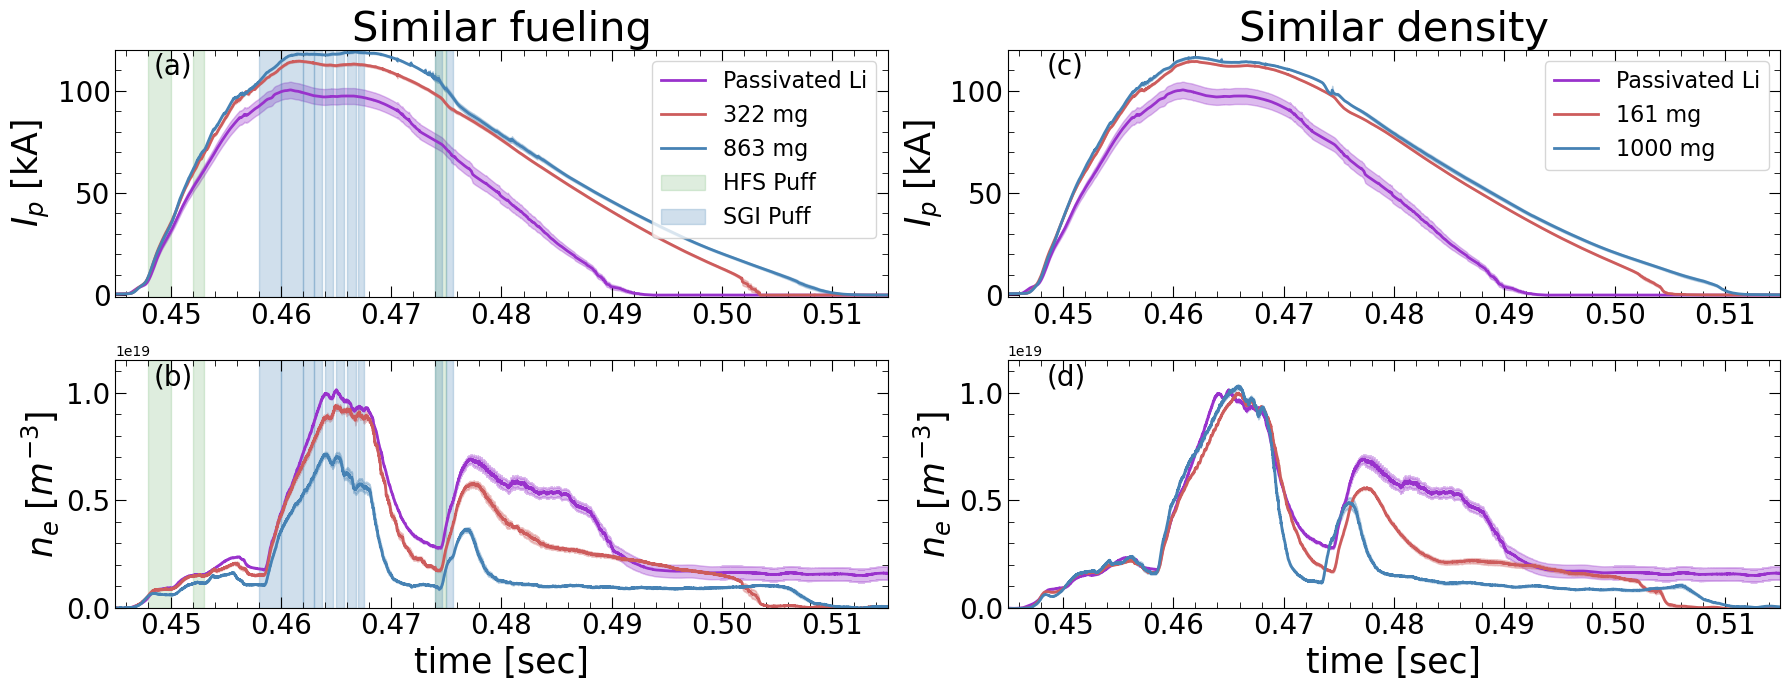

In [2]:
datasets = [['pli',322,863],['pli',161,1000]]
shotlist = [[[i for i in range(103779,103821) if i not in [103781,103783,103793,103796,103798]],
            [103845, 103852, 103862, 103863, 103869, 103870, 103877],
             [103926, 103927, 103928, 103929, 103931, 103932, 103940, 103941, 103950, 103951, 103957, 103958, 103959]],
            [[i for i in range(103779,103821) if i not in [103781,103783,103793,103796,103798]],
             [i for i in range(107567,107599) if i not in [107597]],
             [i for i in range(107646,107656)]
             ]]


import ltx_rw as rw 
import data_proc as dp
import matplotlib.pyplot as plt
import plot_fns as pf
from matplotlib.ticker import AutoMinorLocator
import numpy as np
fig, axs = plt.subplots(2,2,figsize=(18,7)) 

axs = axs.flatten()
top = [axs[0], axs[1]]
bottom = [axs[2], axs[3]]
colors = ['darkorchid','indianred','steelblue']
plt_labels = [['Passivated Li', '322 mg', '863 mg'],
              ['Passivated Li', '161 mg', '1000 mg']]

fig_labels = ['(a)','(c)','(b)','(d)']
k = 0

for cases,caselist,ax,glabel in zip(datasets,shotlist,top,plt_labels):
    for case, shots, color, plabel in zip(cases,caselist,colors,glabel):
        #bijlee, samay = [], []
        #for shot in shots:
        #    meta, ip, time = rw.get_ip(shot)
        #    bijlee.append(ip)
        #    samay.append(time)
        #i_avg, i_sem, maap, t_ip = dp.create_mean_1d_signal(len(bijlee),bijlee,samay)
        #np.savetxt(f'ip{case}.txt',(i_avg, i_sem, t_ip))
        i_avg, i_sem, t_ip = np.loadtxt(f'ip{case}.txt')
        ax = pf.plot1d_eband_ax(ax,t_ip,i_avg,i_sem,'',r'$I_p$ [kA]',[0.445,0.515],[-1,120],color,plabel)
    ax.text(0.05,0.9,fig_labels[k],transform=ax.transAxes,fontsize=20)
    k = k+1
    ax.legend(loc='upper right',fontsize=16)
    
for cases,caselist,ax,glabel in zip(datasets,shotlist,bottom,plt_labels):
    for case, shots, color, plabel in zip(cases,caselist,colors,glabel):
        #n_avg, n_sem, maap, t_ne = rw.get_ne_avg_fringe_corr(shots,[0.445,0.515])
        #np.savetxt(f'ne{case}.txt',(n_avg, n_sem, t_ne))
        n_avg, n_sem, t_ne = np.loadtxt(f'ne{case}.txt')
        ax = pf.plot1d_eband_ax(ax,t_ne,n_avg/2,n_sem/2,'time [sec]',r'$n_e$ '+r'[$m^{-3}$]',[0.445,0.515],[-1,1.15e19],color,plabel)
    ax.text(0.05,0.9,fig_labels[k],transform=ax.transAxes,fontsize=20)
    k = k+1
    #ax.legend(loc='upper right',fontsize=16)
    
# add minor ticks to all plots
for ax in axs:
    ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)
    ax.tick_params(axis='both',which='major',length=8)
    ax.tick_params(axis='both',which='minor',length=4)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

rw.ins_puff(103955,[axs[0],axs[2]])
rw.ins_SGI(103955,[axs[0],axs[2]])
axs[0].legend(loc='upper right',fontsize=16)
# add a title to each column
axs[0].set_title('Similar fueling',fontsize=30)
axs[1].set_title('Similar density',fontsize=30)
# save figure
fig.tight_layout()
fig.savefig('fig1.png',dpi=300)

## pumpout plot 

In [1]:
import matplotlib.pyplot as plt
import ltx_rw as rw
import plot_fns as pf
import numpy as np
import ltx_dp as ldp
from scipy import stats

shotclass = ['sep17', 'sep20', 'sep22', 'oct5', 'oct7']
li = ['passLi', '363 mg', '863 mg', '161 mg', '1000 mg']
cs = ['steelblue', 'steelblue', 'steelblue', 'indianred', 'indianred']

shotlist = [[i for i in range(103779,103799) if i not in []],
            [i for i in range(103861,103872) if i not in []],
            [i for i in range(103924,103959) if i not in [103954,103952,103949]],
            [107582,107584,107585,107587,107588,107589],
            [i for i in range(107646,107666) if i not in [107650,107651,107653,107660]]]

eff_mean, eff_err, H2_mean = [], [], []
for shots in shotlist:
    eff = []
    h = []
    for shot in shots:
        #eff.append(ldp.relative_pumping_effeciency(shot,diagnostics=True))
        h.append(ldp.puffed_H2_SGI(shot))        

    #print(eff)
    #eff_mean.append(np.nanmean(eff))
    #eff_err.append(np.nanstd(eff))
    H2_mean.append(np.nanmean(h))

  The MDSplus python module version (7.96.9) does not match
  the version of the installed MDSplus libraries (Unknown).
  Upgrade the module using the mdsplus/python/MDSplus directory of the
  MDSplus installation or set PYTHONPATH=/usr/local/mdsplus/python/MDSplus.


103781 is not a shot, abandon shot


In [2]:
H2_mean

[9.579621052631577e+21,
 9.579621052631579e+21,
 9.579621052631579e+21,
 1.1261768421052632e+22,
 1.1034371052631577e+22]

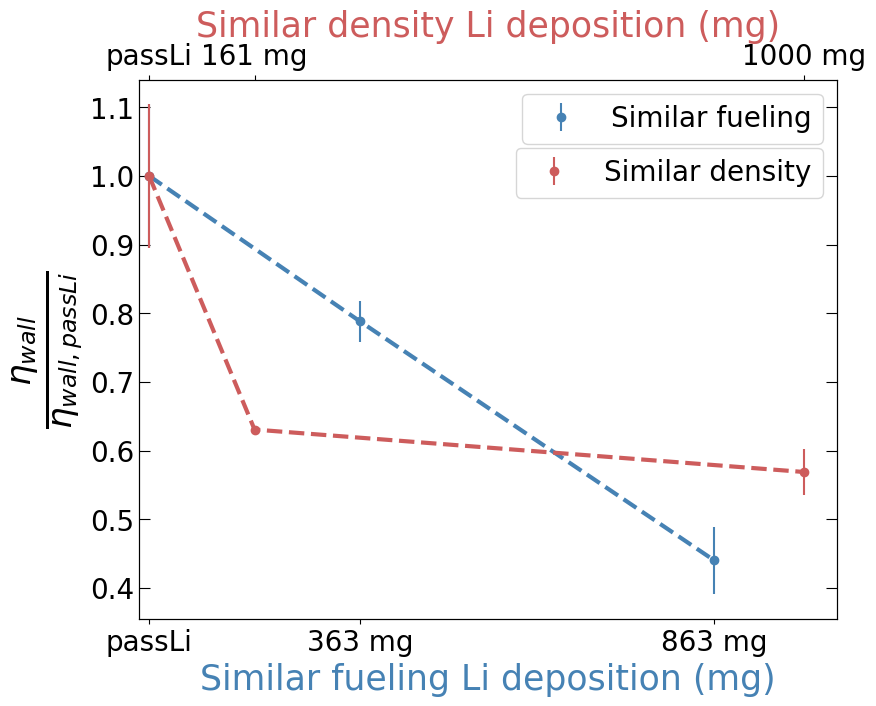

In [5]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
x_b = [0,322,863]
x_u = [0,161,1000]
li_f = ['passLi', '363 mg', '863 mg']
li_d = ['passLi', '161 mg', '1000 mg']
cs = ['steelblue', 'indianred']
eff_mean_norm = [i/eff_mean[0] for i in eff_mean]
eff_err_norm = [i/eff_mean[0] for i in eff_err]
eff_mean_norm_cf = eff_mean_norm[0:3]
eff_err_norm_cf = eff_err_norm[0:3]
eff_mean_norm_li = [eff_mean_norm[0]] + eff_mean_norm[3:]
eff_err_norm_li = [eff_err_norm[0]] + eff_err_norm[3:]
# bottom axis for fueling
ax = pf.scat1d_ebar_ax(ax,x_b,eff_mean_norm_cf,eff_err_norm_cf,'Similar fueling Li deposition (mg)','',c='steelblue',l='Similar fueling')
# also plot wiith line
ax.plot(x_b,eff_mean_norm_cf,c='steelblue',ls='--',linewidth=3)
ax.xaxis.label.set_color('steelblue')
# create a new x axis on top
ax2 = ax.twiny()
ax2 = pf.scat1d_ebar_ax(ax2,x_u,eff_mean_norm_li,eff_err_norm_li,'Similar density Li deposition (mg)','',c='indianred',l='Similar density')
# make x label color red
ax2.xaxis.label.set_color('indianred')
# also plot wiith line
ax2.plot(x_u,eff_mean_norm_li,c='indianred',ls='--',linewidth=3)
ax.set_xlim([-15,1050])
ax2.set_xlim([-15,1050])
# place legend top right
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=20)
# increase ylable size
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel(r'$\frac{\eta_{wall}}{\eta_{wall,passLi}}$', fontsize=35)
# add minor ticks
ax.tick_params(axis='y',which='both',direction='in',right=True,top=True)
ax.tick_params(axis='y',which='major',length=8)
ax.tick_params(axis='y',which='minor',length=4)
# limit xaxis ticklables to li_f and li_d at locations x_b and x_u
ax.set_xticks(x_b)
ax.set_xticklabels(li_f)
ax2.set_xticks(x_u)
ax2.set_xticklabels(li_d)
# add legend entry for density
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.9), fontsize=20)

# save figure
plt.savefig('efficiency.png',dpi=300,bbox_inches='tight')

## Thomson

{'R': [40.0, 43.0, 46.0, 49.0, 52.0, 54.0, 56.0, 58.0, 59.0, 60.0, 62.0], 'Z': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'N_E': [2.2482906034842374e+19, 2.8978666960373494e+19, 2.424050146540836e+19, 2.3728806214889333e+19, 1.4299442292591292e+19, 1.4191425237926445e+19, 9.52126304972947e+18, 5.145362017362945e+18, 2.705461130474634e+18, 2.207972324317746e+18, 3.0771835091888143e+18], 'NE_ERR': [2.0419852572706458e+18, 3.282359310011598e+18, 2.3035470791770353e+18, 2.0787999264358298e+18, 1.3071206936658253e+18, 1.1462062369291644e+18, 9.583183416564512e+17, 7.741196289749697e+17, 6.315693059670653e+17, 8.21131068009179e+17, 1.4584469267402345e+18], 'TE': [175.65037328311254, 255.08309289281803, 240.2320335402549, 226.33896886755218, 156.32602989420553, 102.48870657221428, 76.2759730287646, 68.14694726904324, 94.82061422497968, 344.3797733952346, 368.779369455068], 'TE_ERR': [13.524070200867326, 17.358396854253556, 15.411097028851694, 13.964595985603879, 12.6020032202054

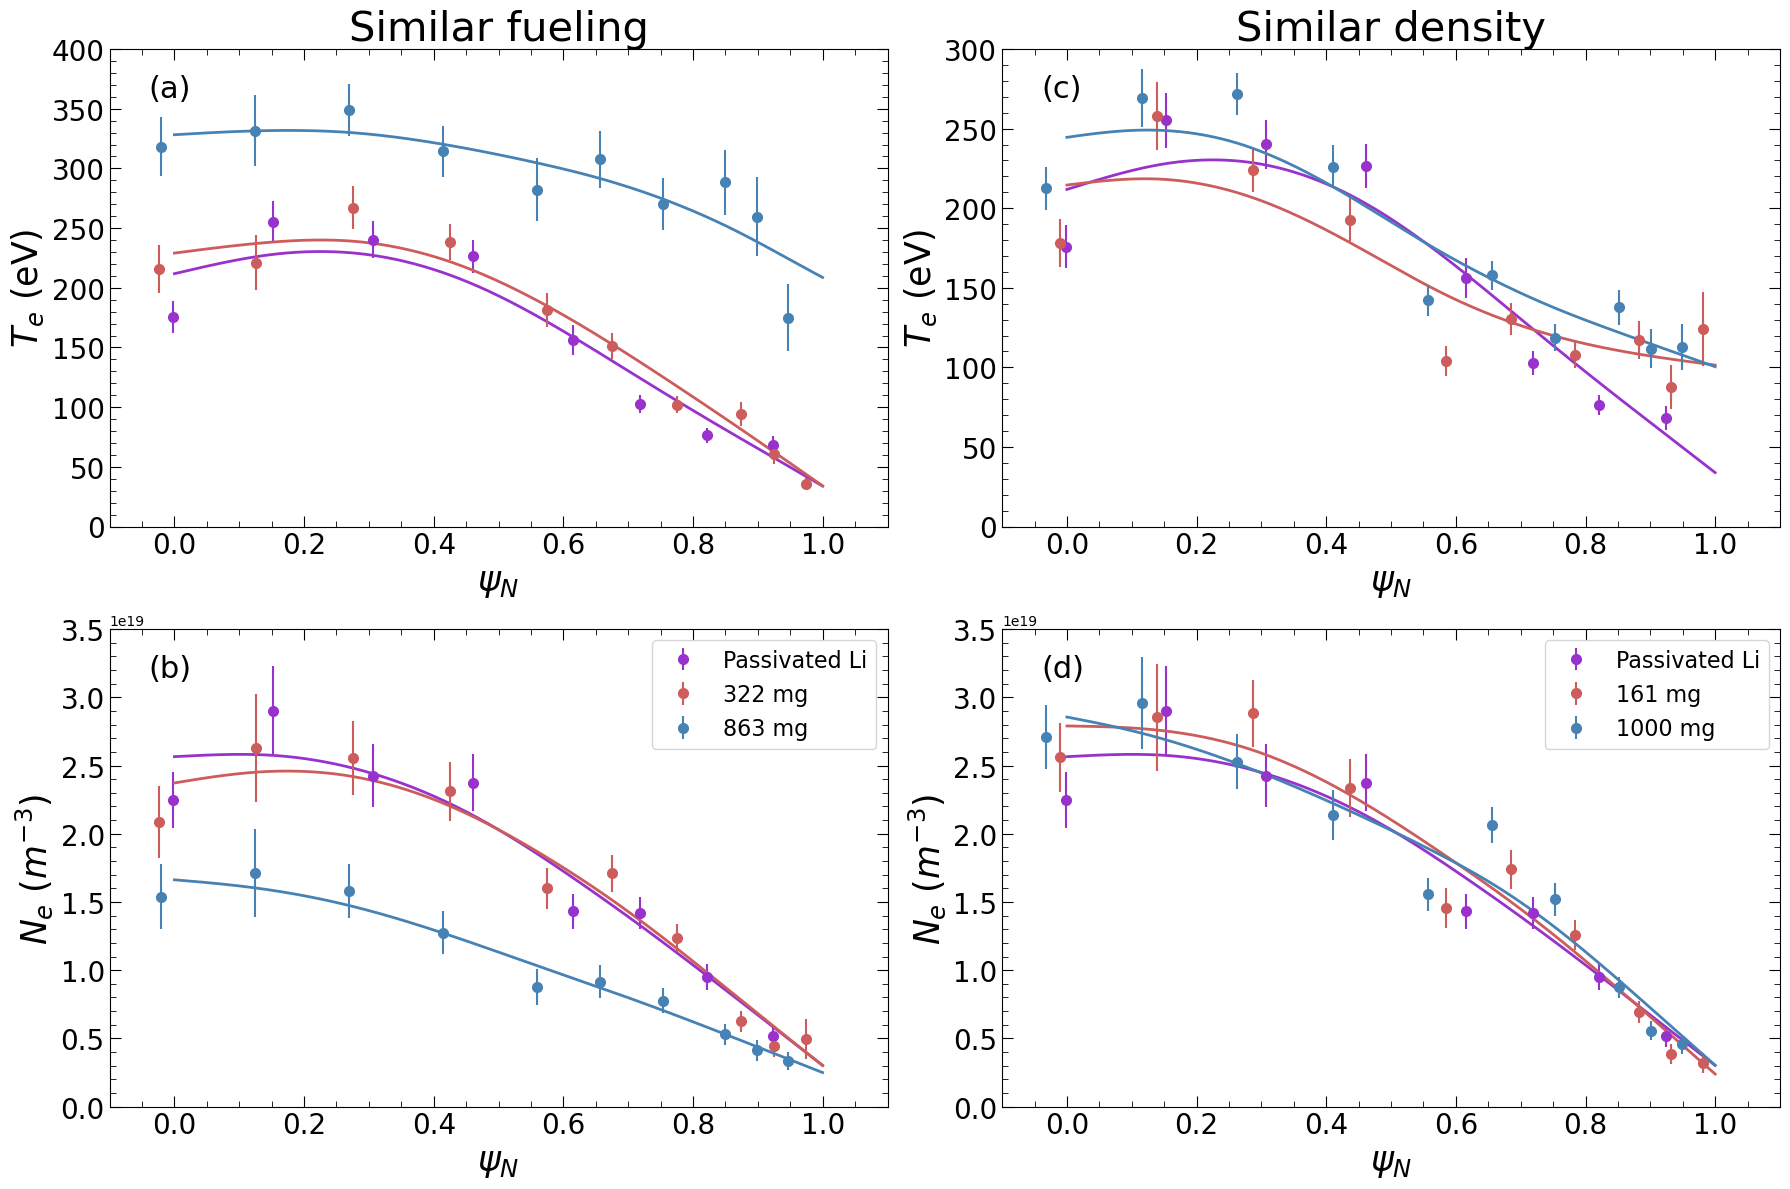

In [2]:
from csaps import csaps

def interp_TS_dat_simple(R,Te,Ne,LCFS,R_0,sm_fac):
    #sm_fac = 0.9
    iR = np.arange(R_0, LCFS, 0.0025)
    iTe = csaps(R, Te, smooth=sm_fac)
    iTe = iTe(iR)
    iNe = csaps(R, Ne, smooth=sm_fac)
    iNe = iNe(iR)
    iR_n = [((i-R_0)/(LCFS-R_0)) for i in iR]
    return iR_n, iTe, iNe

datasets = [['pli',322,863],
            ['pli',161,1000]]
ts = [['TS91768sm.json','TS92068fsm.json','TS92268sm.json'],
      ['TS91768sm.json','TS10568dsm.json','TS10768dsm.json']] 
eqdsks = [['/u/amaan/kin_recon/TS917sm/run_3/LTX_103795_03.eqdsk',
          '/u/amaan/kin_recon/TS920fsm/run_3/LTX_103863_03.eqdsk',
          '/u/amaan/kin_recon/TS922sm-mod_valid/run_3/LTX_103955_03.eqdsk'],
         ['/u/amaan/kin_recon/TS917sm/run_3/LTX_103795_03.eqdsk',
          '/p/ltxdata/reconstructions/eqdsk/TS105dsm/LTX_107581_468.eqdsk',
          '/u/amaan/TS107dsm/LTX_107656_468.eqdsk']]

colors = ['darkorchid','indianred','steelblue']

import ltx_rw as rw 
import data_proc as dp
import matplotlib.pyplot as plt
import plot_fns as pf
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import read_eqdsk_ltx as equilb 
import util_degas2 as util

fig, axs = plt.subplots(2,2,figsize=(18,12)) 
axs = axs.flatten()
top = [axs[0], axs[1]]
bottom = [axs[2], axs[3]]
plt_labels = [['Passivated Li', '322 mg', '863 mg'],
              ['Passivated Li', '161 mg', '1000 mg']]
discard = [3,1,1]
ylims = [[0,400],[0,300]]
for ax,set,thomson,recon,glable,ylimit in zip(top,datasets,ts,eqdsks,plt_labels,ylims):
    for case,ts_dat,reco,plable,c,d in zip(set,thomson,recon,glable,colors,discard):
        #print(case, ts_dat, reco, plable)
        eqdsk = equilb.read_eqdsk(reco)
        psi_0 = eqdsk['psimax']
        psi_wall = eqdsk['psimin']
        psi_N  = np.linspace(0,1,eqdsk['qpsi'].__len__())
        R_0 = eqdsk['raxis']*100
        R_LCFS = max(eqdsk['rzout'][0])*100
        TS = util.get_TS_json(ts_dat)
        R_n = [((i-R_0)/(R_LCFS-R_0)) for i in TS['R']]
        if d > 0:
            ax = pf.scat1d_ebar_ax(ax,R_n[0:-d],TS['Te'][0:-d],TS['Te_err'][0:-d],r'$\psi_N$',r'$T_e$ (eV)',[-0.1,1.1],ylimit,c,plable,7)
            ir, it, ine = interp_TS_dat_simple(TS['R'][0:-d],TS['Te'][0:-d],TS['Ne'][0:-d],R_LCFS,R_0,0.02)
        else:
            ax = pf.scat1d_ebar_ax(ax,R_n,TS['Te'],TS['Te_err'],r'$\psi_N$',r'$T_e$ (eV)',[-0.1,1.1],[0,400],c,plable,7)
            ir, it, ine = interp_TS_dat_simple(TS['R'],TS['Te'],TS['Ne'],R_LCFS,R_0,0.02)
        
        pf.plot1d_ax(ax,ir,it,r'$\psi_N$',r'$T_e$ (eV)',[-0.1,1.1],ylimit,c)

ylims = [[0,3.5e19],[0,3.5e19]]        
for ax,set,thomson,recon,glable,ylimit in zip(bottom,datasets,ts,eqdsks,plt_labels,ylims):
    for case,ts_dat,reco,plable,c,d in zip(set,thomson,recon,glable,colors,discard):
        print(case, ts_dat, reco, plable)
        eqdsk = equilb.read_eqdsk(reco)
        psi_0 = eqdsk['psimax']
        psi_wall = eqdsk['psimin']
        psi_N  = np.linspace(0,1,eqdsk['qpsi'].__len__())
        R_0 = eqdsk['raxis']*100
        R_LCFS = max(eqdsk['rzout'][0])*100
        TS = util.get_TS_json(ts_dat)
        R_n = [((i-R_0)/(R_LCFS-R_0)) for i in TS['R']]
        if d > 0:
            ax = pf.scat1d_ebar_ax(ax,R_n[0:-d],TS['Ne'][0:-d],TS['Ne_err'][0:-d],'','',[-0.1,1.1],ylimit,c,plable,7)
            ir, it, ine = interp_TS_dat_simple(TS['R'][0:-d],TS['Te'][0:-d],TS['Ne'][0:-d],R_LCFS,R_0,0.02)
        else:
            ax = pf.scat1d_ebar_ax(ax,R_n,TS['Te'],TS['Te_err'],r'$\psi_N$',r'$N_e$ ($m^{-3}$)',[-0.1,1.1],ylim,c,plable,7)
        
        pf.plot1d_ax(ax,ir,ine,r'$\psi_N$',r'$N_e$ ($m^{-3}$)',[-0.1,1.1],ylimit,c)
        
# add minor ticks to all plots
for ax in axs:
    ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)
    ax.tick_params(axis='both',which='major',length=8)
    ax.tick_params(axis='both',which='minor',length=4)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    
# add legend
axs[2].legend(loc='upper right',fontsize=16)
axs[3].legend(loc='upper right',fontsize=16)

# add text
axs[0].text(0.05,0.9,'(a)',transform=axs[0].transAxes,fontsize=22)
axs[0].set_title('Similar fueling',fontsize=30)
axs[1].set_title('Similar density',fontsize=30)
axs[2].text(0.05,0.9,'(b)',transform=axs[2].transAxes,fontsize=22)  
axs[1].text(0.05,0.9,'(c)',transform=axs[1].transAxes,fontsize=22)
axs[3].text(0.05,0.9,'(d)',transform=axs[3].transAxes,fontsize=22)

# save fig
fig.tight_layout()
fig.savefig('TS_data.png',dpi=300)

## Lyman-$\alpha$ data

In [1]:
import plot_fns as pf
import matplotlib.pyplot as plt
import read_eqdsk_ltx as ltx_recon
import ltx_disp as disp
import data_proc as dp
import numpy as np
import ltx_rw as rw

datasets = [['pli',322,863],['pli',161,1000]]
shotlist = [[[103790, 103791, 103792, 103795, 103796, 103812, 103813, 103821],
            [103845, 103852, 103862, 103863, 103869, 103870, 103877],
             [103926, 103927, 103928, 103929, 103931, 103932, 103940, 103941, 103950, 103951, 103957, 103958, 103959]],
            [[103790, 103791, 103792, 103795, 103796, 103812, 103813, 103821],
             [107573, 107574, 107584, 107590],
             [107644,107645,107646,107658,107659,107660]
             ]]

for case,shotlists in zip(datasets[0],shotlist[0]):
    d20, t20 = [], [] 
    d10, t10 = [], []
    for shot in shotlists:
        D,T, span = rw.read_pol_lya(shot)
        diode, gain = rw.read_lya_cal(shot)
        d20.append(np.asarray(D[19])/np.asarray(gain[diode.index(20)]))
        t20.append(np.asarray(T[19]))
        d10.append(np.asarray(D[9])/np.asarray(gain[diode.index(10)]))
        t10.append(np.asarray(T[9]))
    fd20_avg, fd20_sem, maap, ft20 = dp.create_mean_1d_signal(len(d20),d20,t20)
    np.savetxt(f'{case}_f20.txt', (fd20_avg, fd20_sem, ft20))
    fd10_avg, fd10_sem, maap, ft10 = dp.create_mean_1d_signal(len(d10),d10,t10)
    np.savetxt(f'{case}_f10.txt', (fd10_avg, fd10_sem, ft10))
    
for case,shotlists in zip(datasets[1],shotlist[1]):
    d20, t20 = [], [] 
    d10, t10 = [], []
    for shot in shotlists:
        D,T, span = rw.read_pol_lya(shot)
        diode, gain = rw.read_lya_cal(shot)
        d20.append(np.asarray(D[19])/np.asarray(gain[diode.index(20)]))
        t20.append(np.asarray(T[19]))
        d10.append(np.asarray(D[9])/np.asarray(gain[diode.index(10)]))
        t10.append(np.asarray(T[9]))
    gd20_avg, gd20_sem, maap, gt20 = dp.create_mean_1d_signal(len(d20),d20,t20)
    np.savetxt(f'{case}_d20.txt', (gd20_avg, gd20_sem, gt20))
    gd10_avg, gd10_sem, maap, gt10 = dp.create_mean_1d_signal(len(d10),d10,t10)
    np.savetxt(f'{case}_d10.txt', (gd10_avg, gd10_sem, gt10))
    

  The MDSplus python module version (7.96.9) does not match
  the version of the installed MDSplus libraries (Unknown).
  Upgrade the module using the mdsplus/python/MDSplus directory of the
  MDSplus installation or set PYTHONPATH=/usr/local/mdsplus/python/MDSplus.


  The MDSplus python module version (7.96.9) does not match
  the version of the installed MDSplus libraries (Unknown).
  Upgrade the module using the mdsplus/python/MDSplus directory of the
  MDSplus installation or set PYTHONPATH=/usr/local/mdsplus/python/MDSplus.


darkorchid Passivated Li pli [103790, 103791, 103792, 103795, 103796, 103812, 103813, 103821]


FileNotFoundError: pli_f10.txt not found.

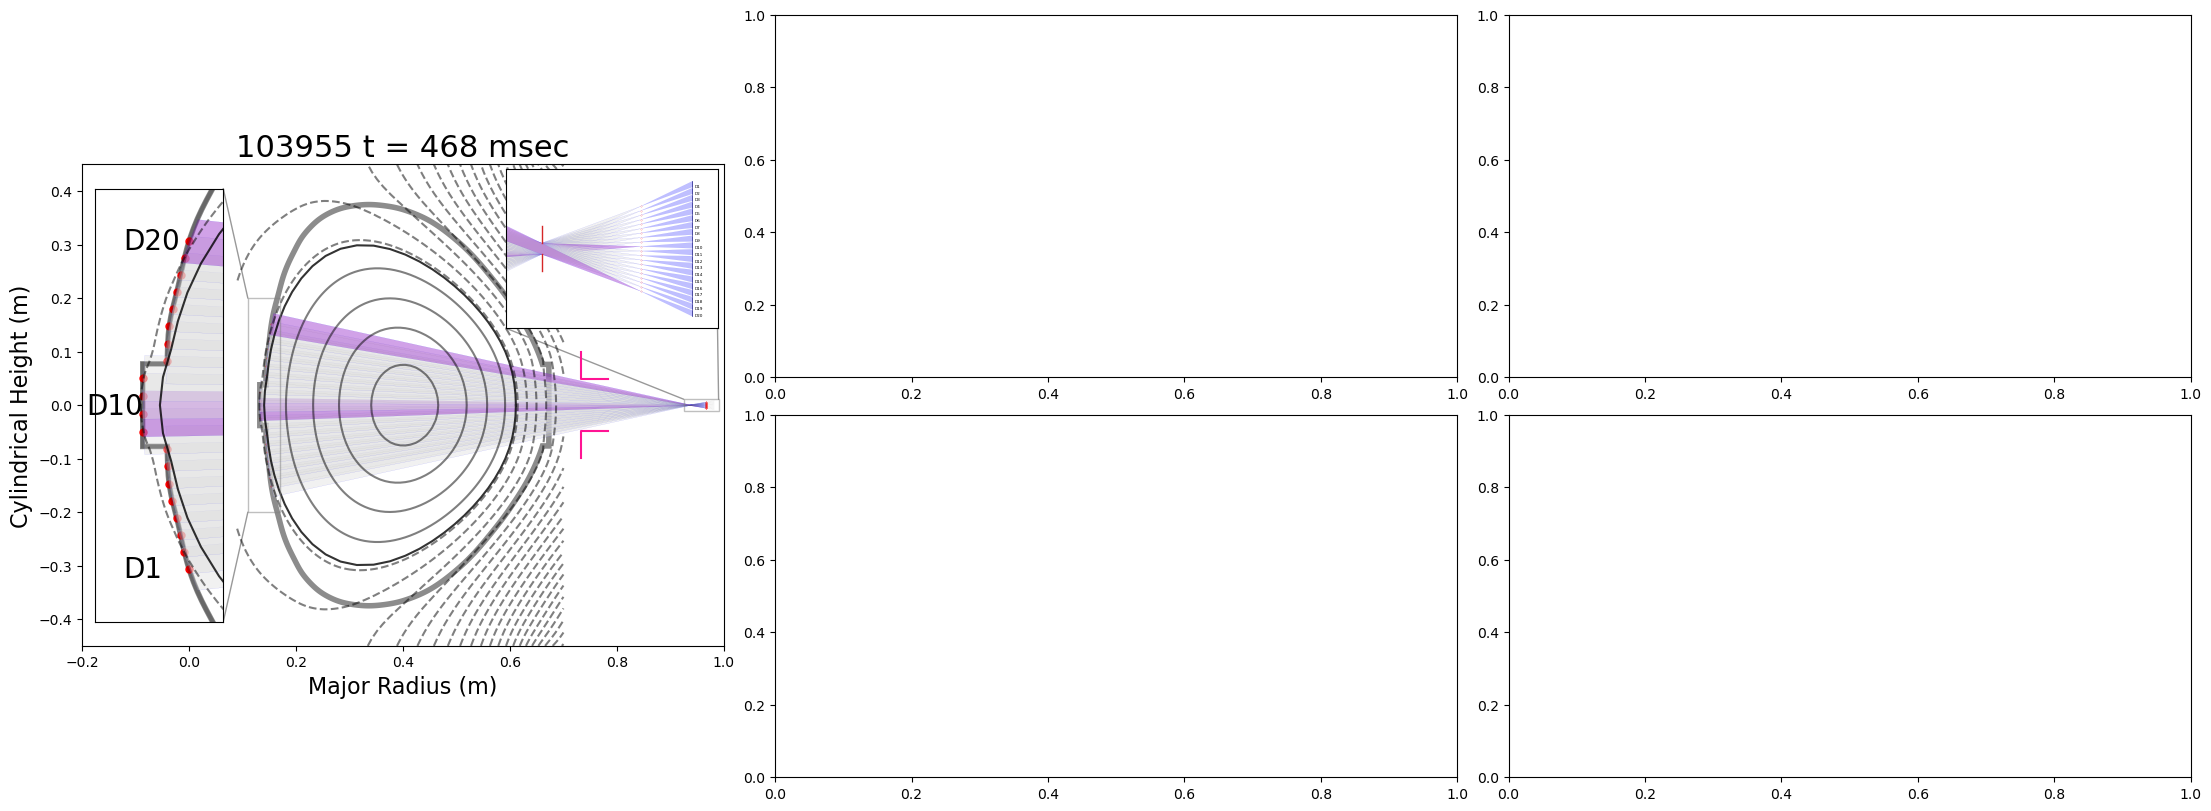

In [24]:
from matplotlib.ticker import AutoMinorLocator
import plot_fns as pf
import read_eqdsk_ltx as ltx_recon
import ltx_disp as disp
import numpy as np
import ltx_rw as rw
import ltx_dp as dp
import data_proc as process

datasets = [['pli',322,863],['pli',161,1000]]
shotlist = [[[103790, 103791, 103792, 103795, 103796, 103812, 103813, 103821],
            [103845, 103852, 103862, 103863, 103869, 103870, 103877],
             [103926, 103927, 103928, 103929, 103931, 103932, 103940, 103941, 103950, 103951, 103957, 103958, 103959]],
            [[103790, 103791, 103792, 103795, 103796, 103812, 103813, 103821],
             [107573, 107574, 107584, 107590],
             [107644,107645,107646,107658,107659,107660]
             ]]

lim_path = '/u/amaan/main/LTX-beta/bin/limiter.dat'
colors = ['darkorchid','indianred','steelblue']
fig, eqlib, axs = pf.gridplot_3_122([22,8])
left = [axs[0], axs[1]]
right = [axs[2], axs[3]]
plt_labels = [['Passivated Li', '322 mg', '863 mg'],
              ['Passivated Li', '161 mg', '1000 mg']]
fig_labels = ['(a)','(b)','(c)','(d)','(e)']
k = 1
eqlib = ltx_recon.recon_plot_ez(ltx_recon.read_eqdsk('/u/amaan/kin_recon/TS922sm-mod_valid/run_3/LTX_103955_03.eqdsk'),103955,468,eqlib,lim_path)
eqlib = disp.disp_pol_array_eqlib(fig,eqlib,'/u/amaan/kin_recon/TS922sm-mod_valid/run_3/LTX_103955_03.eqdsk',103955, 468,20,[10,20])

for names,cases,shotlists,panes in zip(plt_labels,datasets,shotlist,[left,right]):
    for name, case, shots, cs in zip(names,cases,shotlists,colors):
        print(cs, name, case,shots)
        if name in plt_labels[0]:
            top,bot = panes[0],panes[1]
            cf, cef, ct = np.loadtxt(f'{case}_f10.txt')
            cf = dp.pol_lya_photoemission_rate(cf)
            cef = dp.pol_lya_photoemission_rate(cef)
            cf = process.filter(cf,ct)
            top_f = pf.plot1d_eband_ax(top,ct,cf,cef,'',r'$D_{10}$',[0.445,0.515],[0,10e19],cs,name)
            ef, eef, et = np.loadtxt(f'{case}_f20.txt')
            ef = dp.pol_lya_photoemission_rate(ef)
            eef = dp.pol_lya_photoemission_rate(eef)
            bot_f = pf.plot1d_eband_ax(bot,et,ef,eef,'time [sec]',r'$D_{20}$',[0.445,0.515],[0,10e19],cs,name)
        elif name in plt_labels[1]:
            top,bot = panes[0],panes[1]
            cd, ced, ct = np.loadtxt(f'{case}_d10.txt')
            cd = dp.pol_lya_photoemission_rate(cd)
            ced = dp.pol_lya_photoemission_rate(ced)
            cd = process.filter(cd,ct)
            top_d = pf.plot1d_eband_ax(top,ct,cd,ced,'',r'$D_{10}$',[0.445,0.515],[0,10e19],cs,name)
            ed, eed, et = np.loadtxt(f'{case}_d20.txt')
            ed = dp.pol_lya_photoemission_rate(ed)
            eed = dp.pol_lya_photoemission_rate(eed)
            bot_d = pf.plot1d_eband_ax(bot,et,ed,eed,'time [sec]',r'$D_{20}$',[0.445,0.515],[0,10e19],cs,name)
           
# add minor ticks
for ax in axs:
    ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)
    ax.tick_params(axis='both',which='major',length=8)
    ax.tick_params(axis='both',which='minor',length=4)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    if fig_labels[k] == '(b)':
        ax.set_title('Similar fueling',fontsize=30)
    if fig_labels[k] == '(d)':
        ax.set_title('Similar density',fontsize=30)
    ax.text(0.05,0.9,fig_labels[k],transform=ax.transAxes,fontsize=20)
    if k in [1,2]:
        rw.ins_puff(103955,[ax])
        rw.ins_SGI(103955,[ax])
    if k in [1,3]:
        ax.legend(loc='upper right',fontsize=15)
    k += 1

# remove legend from axs[1]
axs[1].legend().remove()

# set larger fonts on equilib and call it a) 
eqlib.tick_params(axis='both',which='major',labelsize=20)
eqlib.tick_params(axis='both',which='minor',labelsize=20)
eqlib.set_xlabel(r'$R$ [m]',fontsize=25)
eqlib.set_ylabel(r'$Z$ [m]',fontsize=25)
eqlib.text(0.9,0.05,fig_labels[0],transform=eqlib.transAxes,fontsize=25)

# save figure
fig.savefig('lyman.png',dpi=300,bbox_inches='tight')

## Check decay in Ly-$\alpha$ transmission 

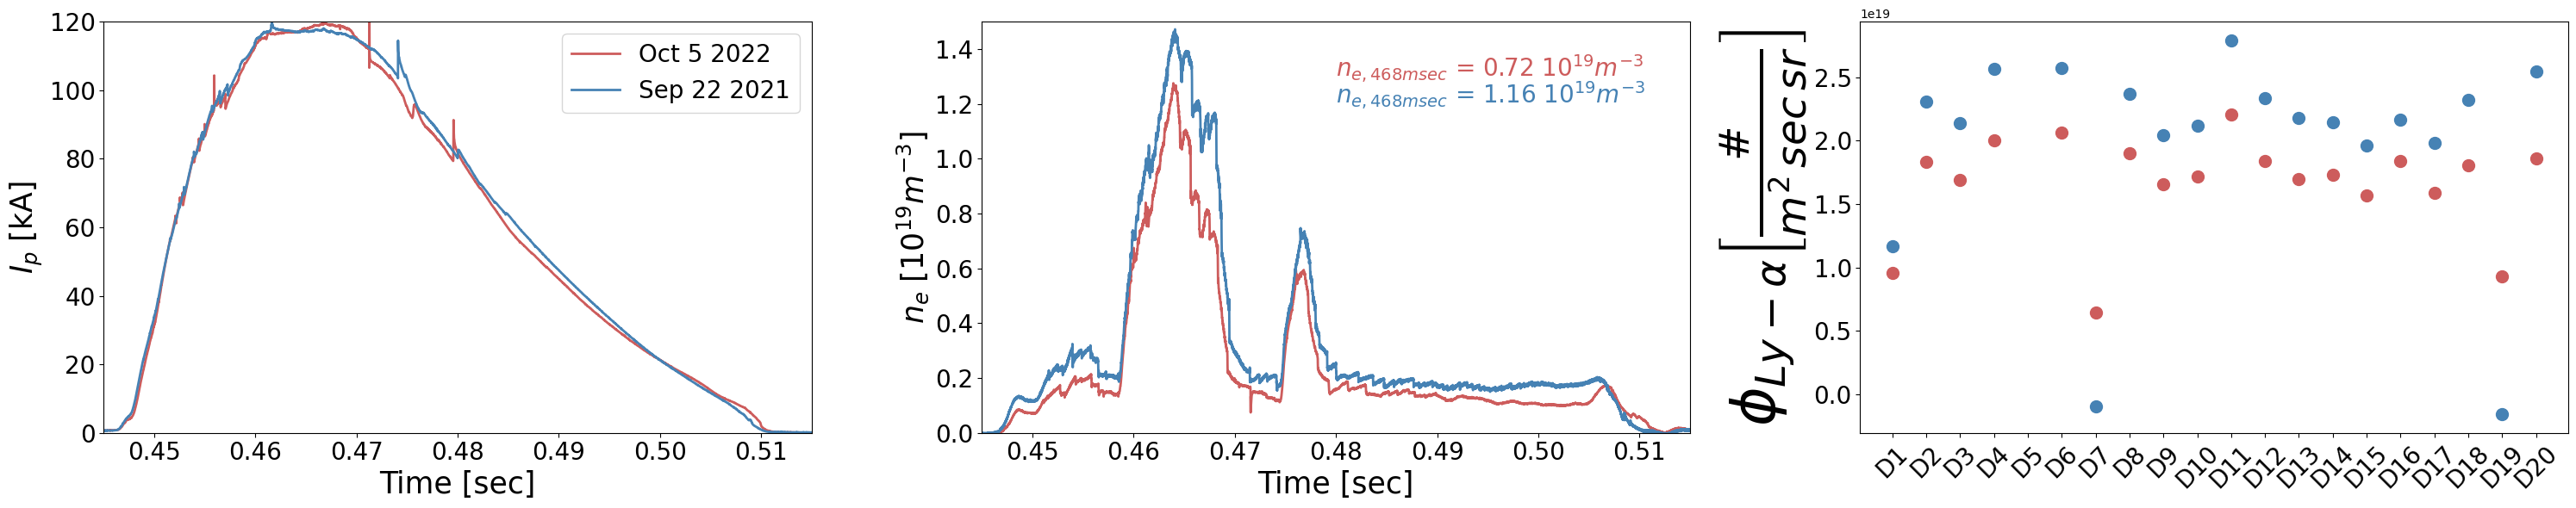

In [43]:
import ltx_rw as rw 
import matplotlib.pyplot as plt
import ltx_disp as disp
import data_proc as dp
import plot_fns as pf

fig, ax = plt.subplots(1,3,figsize=(30,6))
meta, ip, ip_t = rw.get_ip(107700)
ne, netime = rw.get_fringe_corr_ne(107698,[0.44,0.54])
ax[0] = pf.plot1d_ax(ax[0],ip_t, ip, 'Time [sec]',r'$I_p$ [kA]',[0.445,0.515],[0,125],'indianred','Oct 5 2022')
ax[1] = pf.plot1d_ax(ax[1],netime, ne/1e19, 'Time [sec]',r'$n_e$ [$10^{19} m^{-3}$]',[0.445,0.515],[0,1.5],'indianred','Oct 5 2022')
ne_468 = ne[dp.near(netime, 0.468)]
ax[1].text(0.48, 1.3, r'$n_{e,468 msec}$ = '+str(round(ne_468/1e19,2))+' $10^{19} m^{-3}$', fontsize=20, color='indianred')
disp.pol_lya_profile_time(rw.read_pol_lya_time(107700, 0.468)[0], ax[2], 107700, 'indianred')

meta, ip, ip_t = rw.get_ip(103955)
ne, netime = rw.get_fringe_corr_ne(103955,[0.44,0.54])
ax[0] = pf.plot1d_ax(ax[0],ip_t, ip, 'Time [sec]',r'$I_p$ [kA]',[0.445,0.515],[0,120],'steelblue','Sep 22 2021')
ax[1] = pf.plot1d_ax(ax[1],netime, ne/1e19, 'Time [sec]',r'$n_e$ [$10^{19} m^{-3}$]',[0.445,0.515],[0,1.5],'steelblue','Sep 22 2021')
ne_468 = ne[dp.near(netime, 0.468)]
ax[1].text(0.48, 1.2, r'$n_{e,468 msec}$ = '+str(round(ne_468/1e19,2))+' $10^{19} m^{-3}$', fontsize=20, color='steelblue')
disp.pol_lya_profile_time(rw.read_pol_lya_time(103955, 0.468)[0], ax[2], 103955, 'steelblue')
fig.tight_layout()
# add legend to ax[0]
ax[0].legend(loc='upper right', fontsize=20)


## Density decay comparison

unsupported operand type(s) for *: 'NoneType' and 'int'


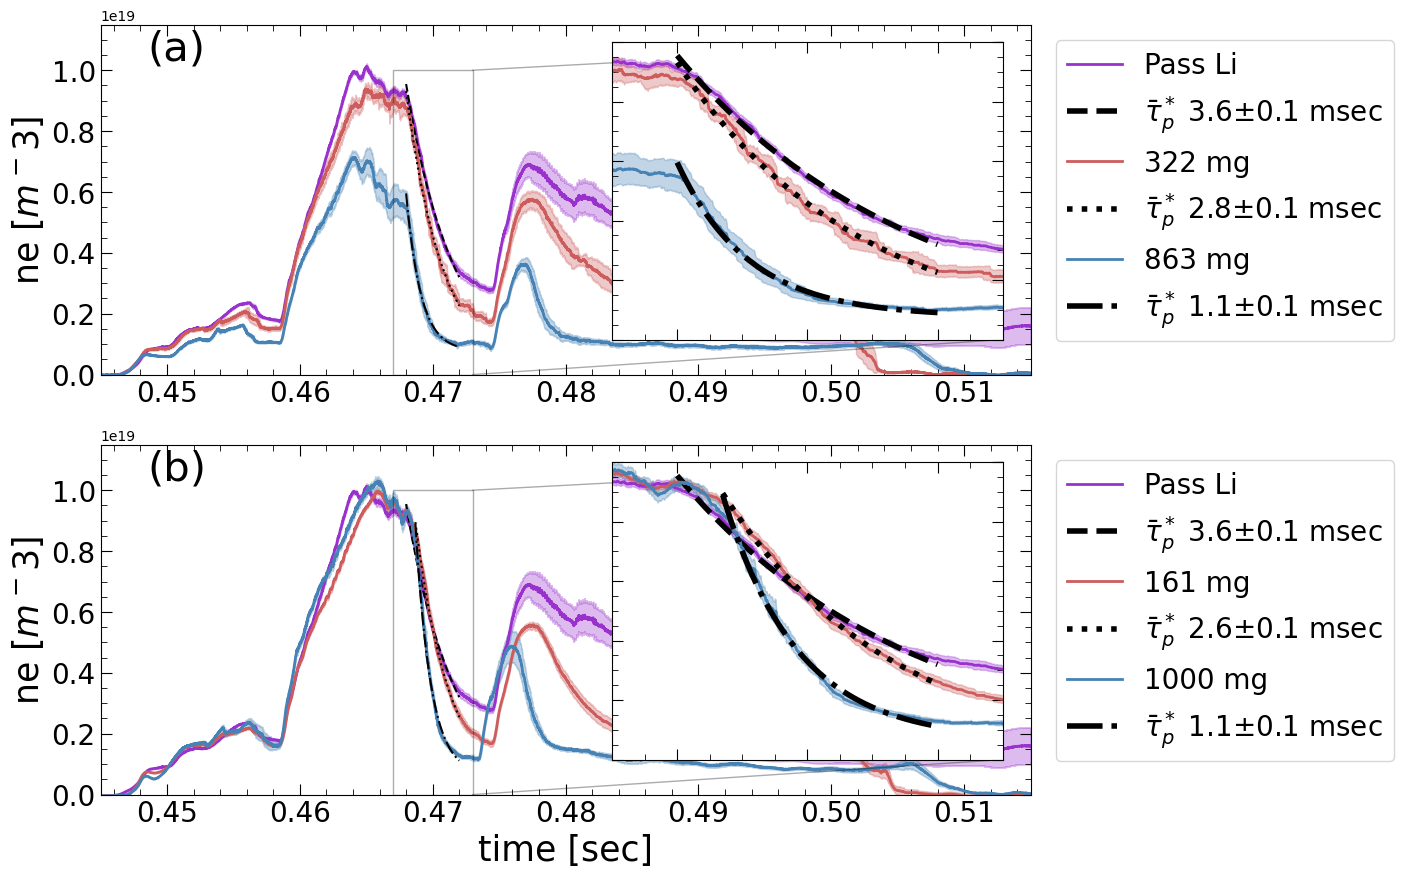

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import plot_fns as pf
import ltx_dp as process
from matplotlib.ticker import AutoMinorLocator

nepli = np.loadtxt('nepli.txt')
ne322 = np.loadtxt('ne322.txt')
ne863 = np.loadtxt('ne863.txt')
ne161 = np.loadtxt('ne161.txt')
ne1000 = np.loadtxt('ne1000.txt')
density = [nepli,ne322,ne863,ne161,ne1000]
spans = [[0.468,0.472],[0.468,0.472],[0.468,0.472],[0.4687,0.472],[0.4687,0.472]]
decays = []
for n,span in zip(density,spans):
    decay = process.density_decay_fit(n[0],n[2],span,verbose=False)
    decays.append(decay)

# sim fueling 
density = [nepli,ne322,ne863]
decays_f = decays[:3]

import matplotlib.pyplot as plt

colors = ['darkorchid','indianred','steelblue']
plt_labels = [['Pass Li', '322 mg', '863 mg'],
              ['Pass Li', '161 mg', '1000 mg']]
ls = ['--',':','-.']

fig, axs = plt.subplots(2,1,figsize=(12,10))
axs = axs.flatten()
f = axs[0]
i = 0
f, ins_f = pf.ins_inset(f,[0.55,0.1,0.42,0.85],[0.467,0.473,0,1e19])
for n,decay,l,c,m in zip(density,decays_f,plt_labels[0],colors,ls):
    f = pf.plot1d_eband_ax(f,n[2],n[0]/2,n[1],'',r'ne [$m^-3$]',[0.445,0.515],[-1,1.15e19],c,l)
    f_ins = pf.plot1d_eband_ax(ins_f,n[2],n[0]/2,n[1],'','',[0.467,0.473],[0,1e19],c,l)
    f.plot(decay[1][0],decay[1][1]/2,c='k',linestyle=m)
    f_ins.plot(decay[1][0],decay[1][1]/2,c='k',linestyle=m,label=r'$\bar\tau_{p}^*$'+ f' {decay[0]}'+r'$\pm$' '0.1 msec',linewidth=4)
    pf.add_minor_ticks(f_ins)
    i += 1
# place legend outside to the right
#f.legend(loc='center left', bbox_to_anchor=(1, 0.8),fontsize=20)
f_ins.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fontsize=20)

density = [nepli,ne161,ne1000]
decays_d = [decays[0]] + decays[3:]

f = axs[1]
i = 0
f, ins_f = pf.ins_inset(f,[0.55,0.1,0.42,0.85],[0.467,0.473,0,1e19])
for n,decay,l,c,m in zip(density,decays_d,plt_labels[1],colors,ls):
    f = pf.plot1d_eband_ax(f,n[2],n[0]/2,n[1],'time [sec]',r'ne [$m^-3$]',[0.445,0.515],[-1,1.15e19],c,l)
    f_ins = pf.plot1d_eband_ax(ins_f,n[2],n[0]/2,n[1],'','',[0.467,0.473],[0,1e19],c,l)
    f.plot(decay[1][0],decay[1][1]/2,c='k',linestyle=m)
    f_ins.plot(decay[1][0],decay[1][1]/2,c='k',linestyle=m,label=r'$\bar\tau_{p}^*$'+ f' {decay[0]}'+r'$\pm$' '0.1 msec',linewidth=4)
    # add axis tick labels to f_ins
    
    pf.add_minor_ticks(f_ins)
    i += 1
# place legend outside to the right
#f.legend(loc='center left', bbox_to_anchor=(1, 0.8),fontsize=20)
f_ins.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fontsize=20)
# add minor ticks to all axis
for ax in axs:
    ax.tick_params(axis='both',which='both',direction='in',right=True,top=True)
    ax.tick_params(axis='both',which='major',length=8)
    ax.tick_params(axis='both',which='minor',length=4)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
fig_labels = ['(a)','(b)']
for ax, l in zip(axs,fig_labels):
    ax.text(0.05,0.9,l,transform=ax.transAxes,fontsize=30)

# save figure
plt.savefig('density_decay.png',dpi=300,bbox_inches='tight')


## Comparison with TRANSP tau_e

## Convergence

## $\tau_p^*$ vs $\tau_{E,TRANSP}$ scatter plot

In [41]:
# unpack avg_conf_f


[1.299045, 0.14423946]

## beam fueling

### read and save data

In [6]:
shot_list_b = [108470,108471,108474,108478,108479,
               108483,108486,108487,108490,108492,108495,108498,108499,108502,
               108503,108506,108507,108510,108511]

shot_list_f = [108476,108477,108480,108481,108484,108485,
               108488,108494,108496,108497,108500,108501,
               108504,108505,108508,108509]

shotlists = [shot_list_b,shot_list_f]
import numpy as np
import ltx_rw as rw 
import ltx_dp as dp
import data_proc as process
cases = ['beam','no_beam']
for shotlist, case in zip(shotlists, cases):
    bijlee, samay = [], []
    for shot in shotlist:
        meta, ip, time = rw.get_ip(shot)
        bijlee.append(ip)
        samay.append(time)
    i_avg, i_sem, maap, t_ip = process.create_mean_1d_signal(len(bijlee),bijlee,samay)
    np.savetxt(f'ip_{case}.txt',(i_avg, i_sem, t_ip))
    n_avg, n_sem, maap, t_ne = rw.get_ne_avg_fringe_corr(shotlist,[0.445,0.515])
    np.savetxt(f'ne_{case}.txt',(n_avg, n_sem, t_ne))


beam 2.1020188
no_beam 2.6351302


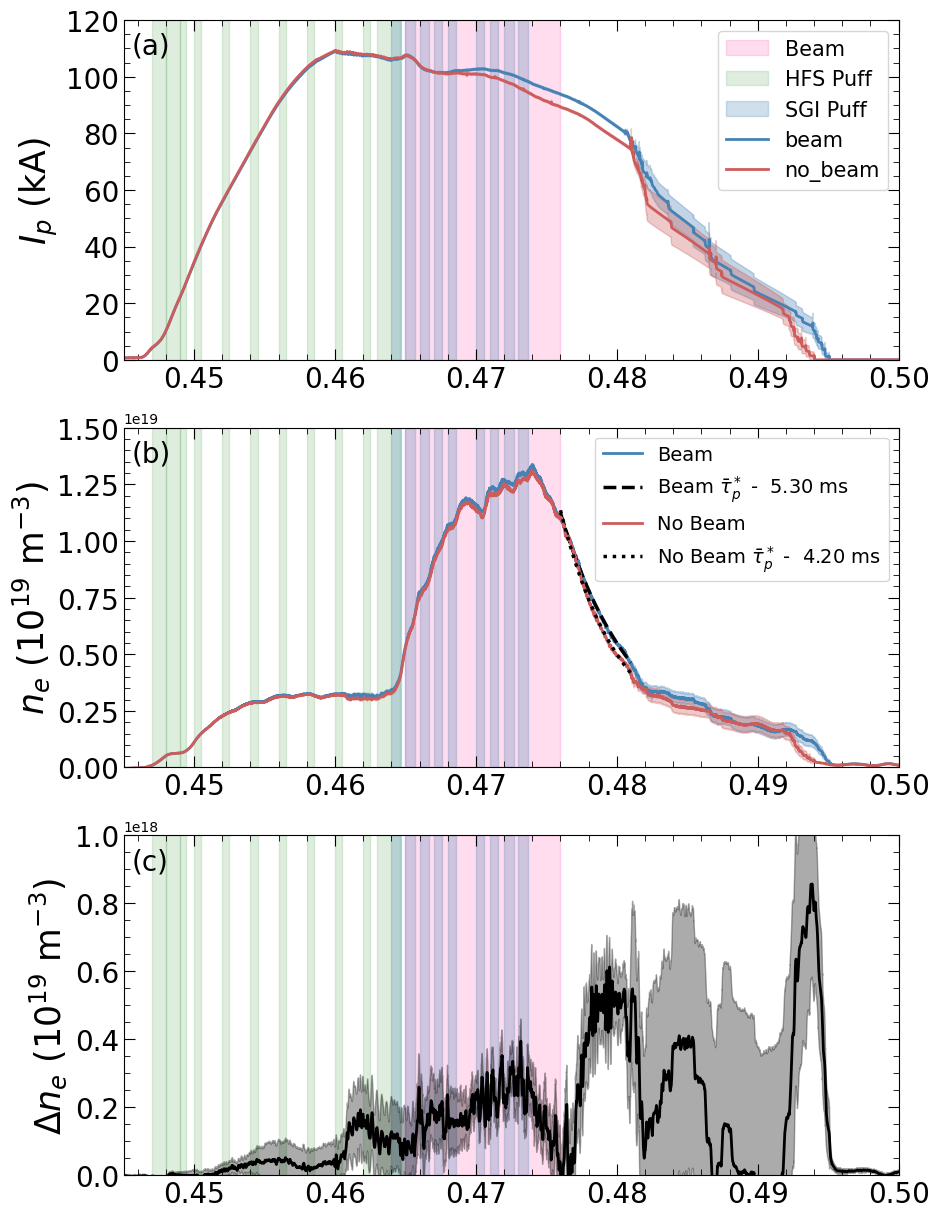

In [22]:
cases = ['beam','no_beam']
colors = ['steelblue','indianred']
#i_avg, i_sem, t_ip = np.loadtxt(f'ip_{case}.txt')
#n_avg, n_sem, t_ne = np.loadtxt(f'ne_{case}.txt')
tr_shots = [1084870301,1084880101]

import matplotlib.pyplot as plt
import ltx_rw as read
import ltx_dp as process
import plot_fns as plot
import numpy as np
import data_proc as dp


fig, ax = plt.subplots(3,1,figsize=(10,15))
read.ins_beam(108470,ax)
read.ins_puff(108470,ax)
read.ins_SGI(108470,ax)
ls = ['--',':']
#f, ins_f = plot.ins_inset(ax[1],[0.15,0.38,0.2,0.5],[0.475,0.482,0.25e19,1.25e19])
f = ax[1]
for case, color, tr,lt in zip(cases,colors,tr_shots,ls):
    i, ie, it = np.loadtxt(f'ip_{case}.txt')
    plot.plot1d_eband_ax(ax[0],it,i,ie,'',r'$I_p$ (kA)',[0.445,0.5],[0,120],color,case)
    n, ne, nt = np.loadtxt(f'ne_{case}.txt')
    if case == 'beam':
        beam = n,ne,nt
        case_l = 'Beam'
    if case == 'no_beam':
        no_beam = n,ne,nt
        case_l = 'No Beam'  
    plot.plot1d_eband_ax(f,nt,n/2,ne/2,'',r'$n_e$ (10$^{19}$ m$^{-3}$)',[0.445,0.5],[0,1.5e19],color,case_l)
    decay = process.density_decay_fit(n,nt,[0.476,0.481],verbose=False)
    f.plot(decay[1][0],decay[1][1]/2,c='k',linestyle=lt,linewidth=2.5,label=case_l+r' $\bar\tau_p^*$ - '+f' {decay[0]:.2f} ms')
    #plot.plot1d_eband_ax(ins_f,nt,n/2,ne/2,'time [sec]',r'$n_e$ (10$^{19}$ m$^{-3}$)',[0.475,0.482],[0.25e19,1.25e19],color,case)
    #ins_f.plot(decay[1][0],decay[1][1]/2,c='k',linestyle=lt,linewidth=2.5,label=case+r' $\tau_p^*$ - '+f' {decay[0]:.2f} ms')
    # add legend to inset
    
    tau,t = read.TRANSP_read_1D(tr,'\TAUA1')
    tau_e = tau*1000
    # get the average tau_e over the time span [0.476,0.481]
    tau_e_avg = np.mean(tau_e[(t>0.476) & (t<0.481)])
    print(case,tau_e_avg)
ax[0].legend(loc='upper right',prop=dict(size=15))
n_diff = beam[0] - no_beam[0]
n_diff = dp.filter(n_diff,beam[2],window=501,order=3)
ne_diff = np.sqrt(np.asarray(beam[1])**2 + np.asarray(no_beam[1])**2)
plot.plot1d_eband_ax(ax[2],beam[2],n_diff/2,ne_diff/2,'',r'$\Delta n_e$ (10$^{19}$ m$^{-3}$)',[0.445,0.5],[0,0.1e19],'k','')      
# insert a lengend in f but remove the first three entries
handles, labels = f.get_legend_handles_labels()
f.legend(handles[3:],labels[3:],loc='upper right',prop=dict(size=14))


fig_labes = ['(a)','(b)','(c)','(d)']
for a,l in zip(ax,fig_labes):
    a.text(0.01,0.9,l,transform=a.transAxes,fontsize=20)
    plot.add_minor_ticks(a)
    
# save figure
fig.savefig('beam_tau.png',dpi=300,bbox_inches='tight')

## RGA data

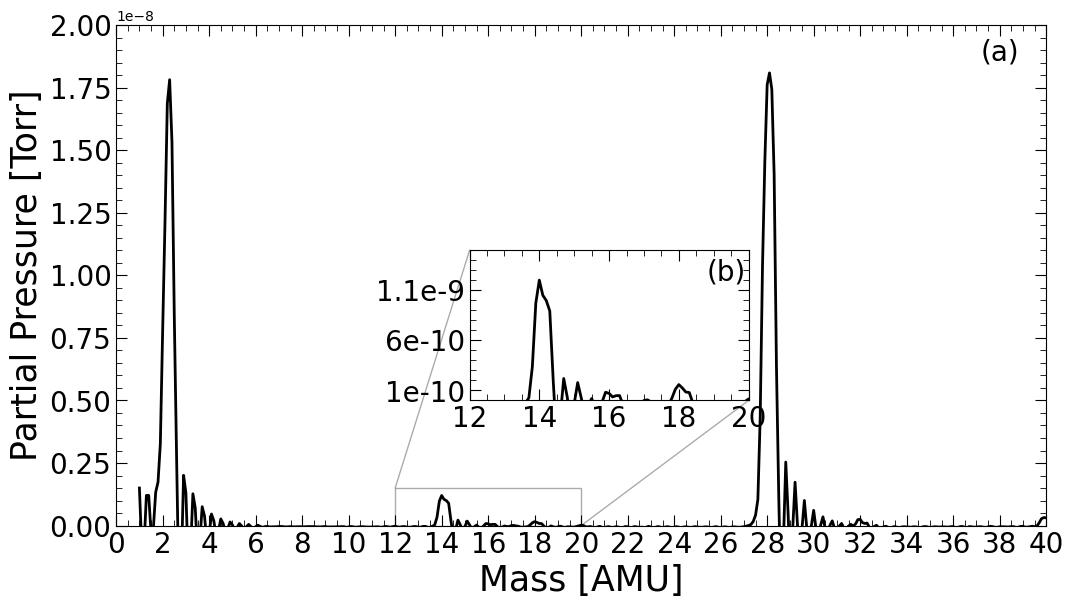

In [83]:
import numpy as np 
import matplotlib.pyplot as plt
import plot_fns as plot

fig, ax = plt.subplots(1,1, figsize=(12,6.5))
mass, I = np.loadtxt('ltx_rga.txt', unpack=True)
ax = plot.plot1d_ax(ax, mass, I, 'Mass [AMU]', 'Partial Pressure [Torr]',[0,40],[0,2e-8],'black','LTX RGA')
# denser x ticklabels   
ax.set_xticks(np.arange(0, 41, 2))
ax, axins = plot.ins_inset(ax,[0.38,0.25,0.3,0.3],[12,20,0,1.5e-9])
axins = plot.plot1d_ax(axins, mass, I, '', '',[12,20],[0,1.5e-9],'black','LTX RGA')

axins.set_xticks(np.arange(12, 22, 2))
axins.set_yticks(np.arange(0.1e-9, 1.5e-9, 0.5e-9))
axins.set_yticklabels(['1e-10','6e-10','1.1e-9'])
axins.set_xticklabels(['12','14','16','18','20'])
ax.text(0.93,0.93,'(a)',transform=ax.transAxes,fontsize=20)
axins.text(0.85,0.8,'(b)',transform=axins.transAxes,fontsize=20)
axs = [ax, axins]
fig_labels  = ['(a)','(b)']
for ax,l in zip(axs,fig_labels):
    plot.add_minor_ticks(ax)

    
# save figure
fig.savefig('ltx_rga.png',dpi=300,bbox_inches='tight')

## nominal fit  

In [2]:
import os
os.getcwd()

'/u/amaan/main/LTX-beta/pub_plots/pop2023'

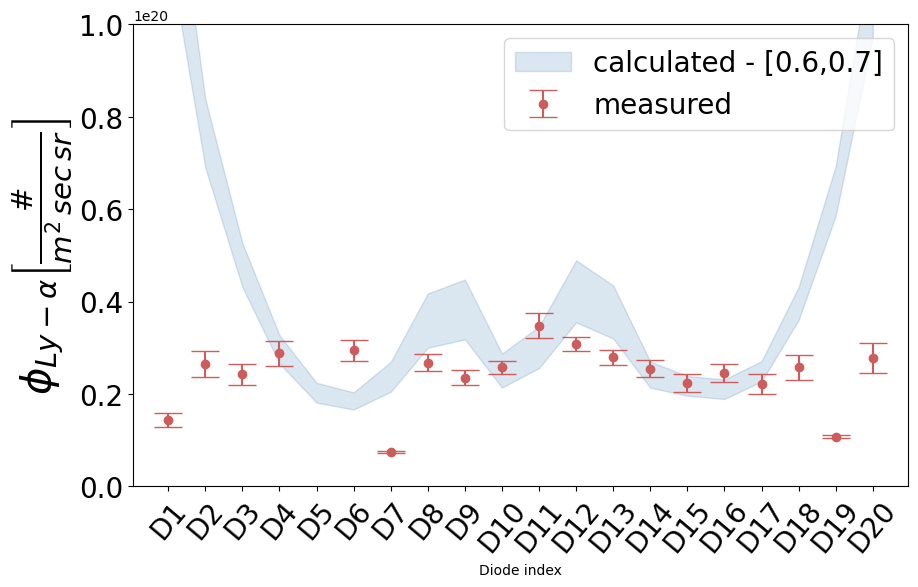

In [5]:
import numpy as np 
import plot_fns as plot
import matplotlib.pyplot as plt

m, me = np.loadtxt('/u/amaan/main/LTX-beta/DEGAS2/1000_6_meas.txt')
c6, c6e = np.loadtxt('/u/amaan/main/LTX-beta/DEGAS2/1000_6_calc.txt')
c7, c7e = np.loadtxt('/u/amaan/main/LTX-beta/DEGAS2/1000_7_calc.txt')
fig, ax = plt.subplots(figsize=(10,6))
labels = ['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11',
              'D12','D13','D14','D15','D16','D17','D18','D19','D20']
ax.errorbar([i+1 for i in range(20)],m,me,fmt='o',capsize=10,color='indianred',label='measured')
ax.fill_between([i+1 for i in range(20)],c6-c6e,c7+c7e,color='steelblue',alpha=0.2,label='calculated - [0.6,0.7]')

ax.set_xticks([i+1 for i in range(20)])
ax.set_ylabel(r'$\phi_{Ly-\alpha} \left[\frac{\#}{m^{2}\,sec\,sr} \right]$', fontsize = 30)

ax.set_xlabel('Diode index')
ax.legend(loc='upper right',prop=dict(size=20))
xx = ax.set_xticklabels(labels,rotation=50)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylim(0,1e20)
# save
fig.savefig('/u/amaan/main/LTX-beta/pub_plots/pop2023/1000.png',dpi=300,bbox_inches='tight')

## Emission and neutral density

In [9]:
import os
import postprocess

shots = ['/p/ltxdata/edge_physics/Analysis/R_similar_fueling/pli/468',
        '/p/ltxdata/edge_physics/Analysis/R_similar_fueling/322/468',
        '/p/ltxdata/edge_physics/Analysis/R_similar_fueling/863/468',
        '/p/ltxdata/edge_physics/Analysis/R_similar_density/161/468',
        '/p/ltxdata/edge_physics/Analysis/R_similar_density/1000/468']
data = []
md = os.getcwd()
for shot in shots:
    
    os.chdir(os.path.join(shot, 'degas2'))
    data.append(postprocess.process_output_with_detectors())
os.chdir(md)

/tmp/ipykernel_12955/4114820980.py:10: RuntimeWarning: divide by zero encountered in log10
  ax, bar = plot.make_2d_plot(fig,ax,x,z,np.log10(d),'linear',[16,18.2])
/tmp/ipykernel_12955/4114820980.py:14: RuntimeWarning: divide by zero encountered in log10
  ax, bar = plot.make_2d_plot(fig,ax,x,z,np.log10(e),'linear',[3,5])


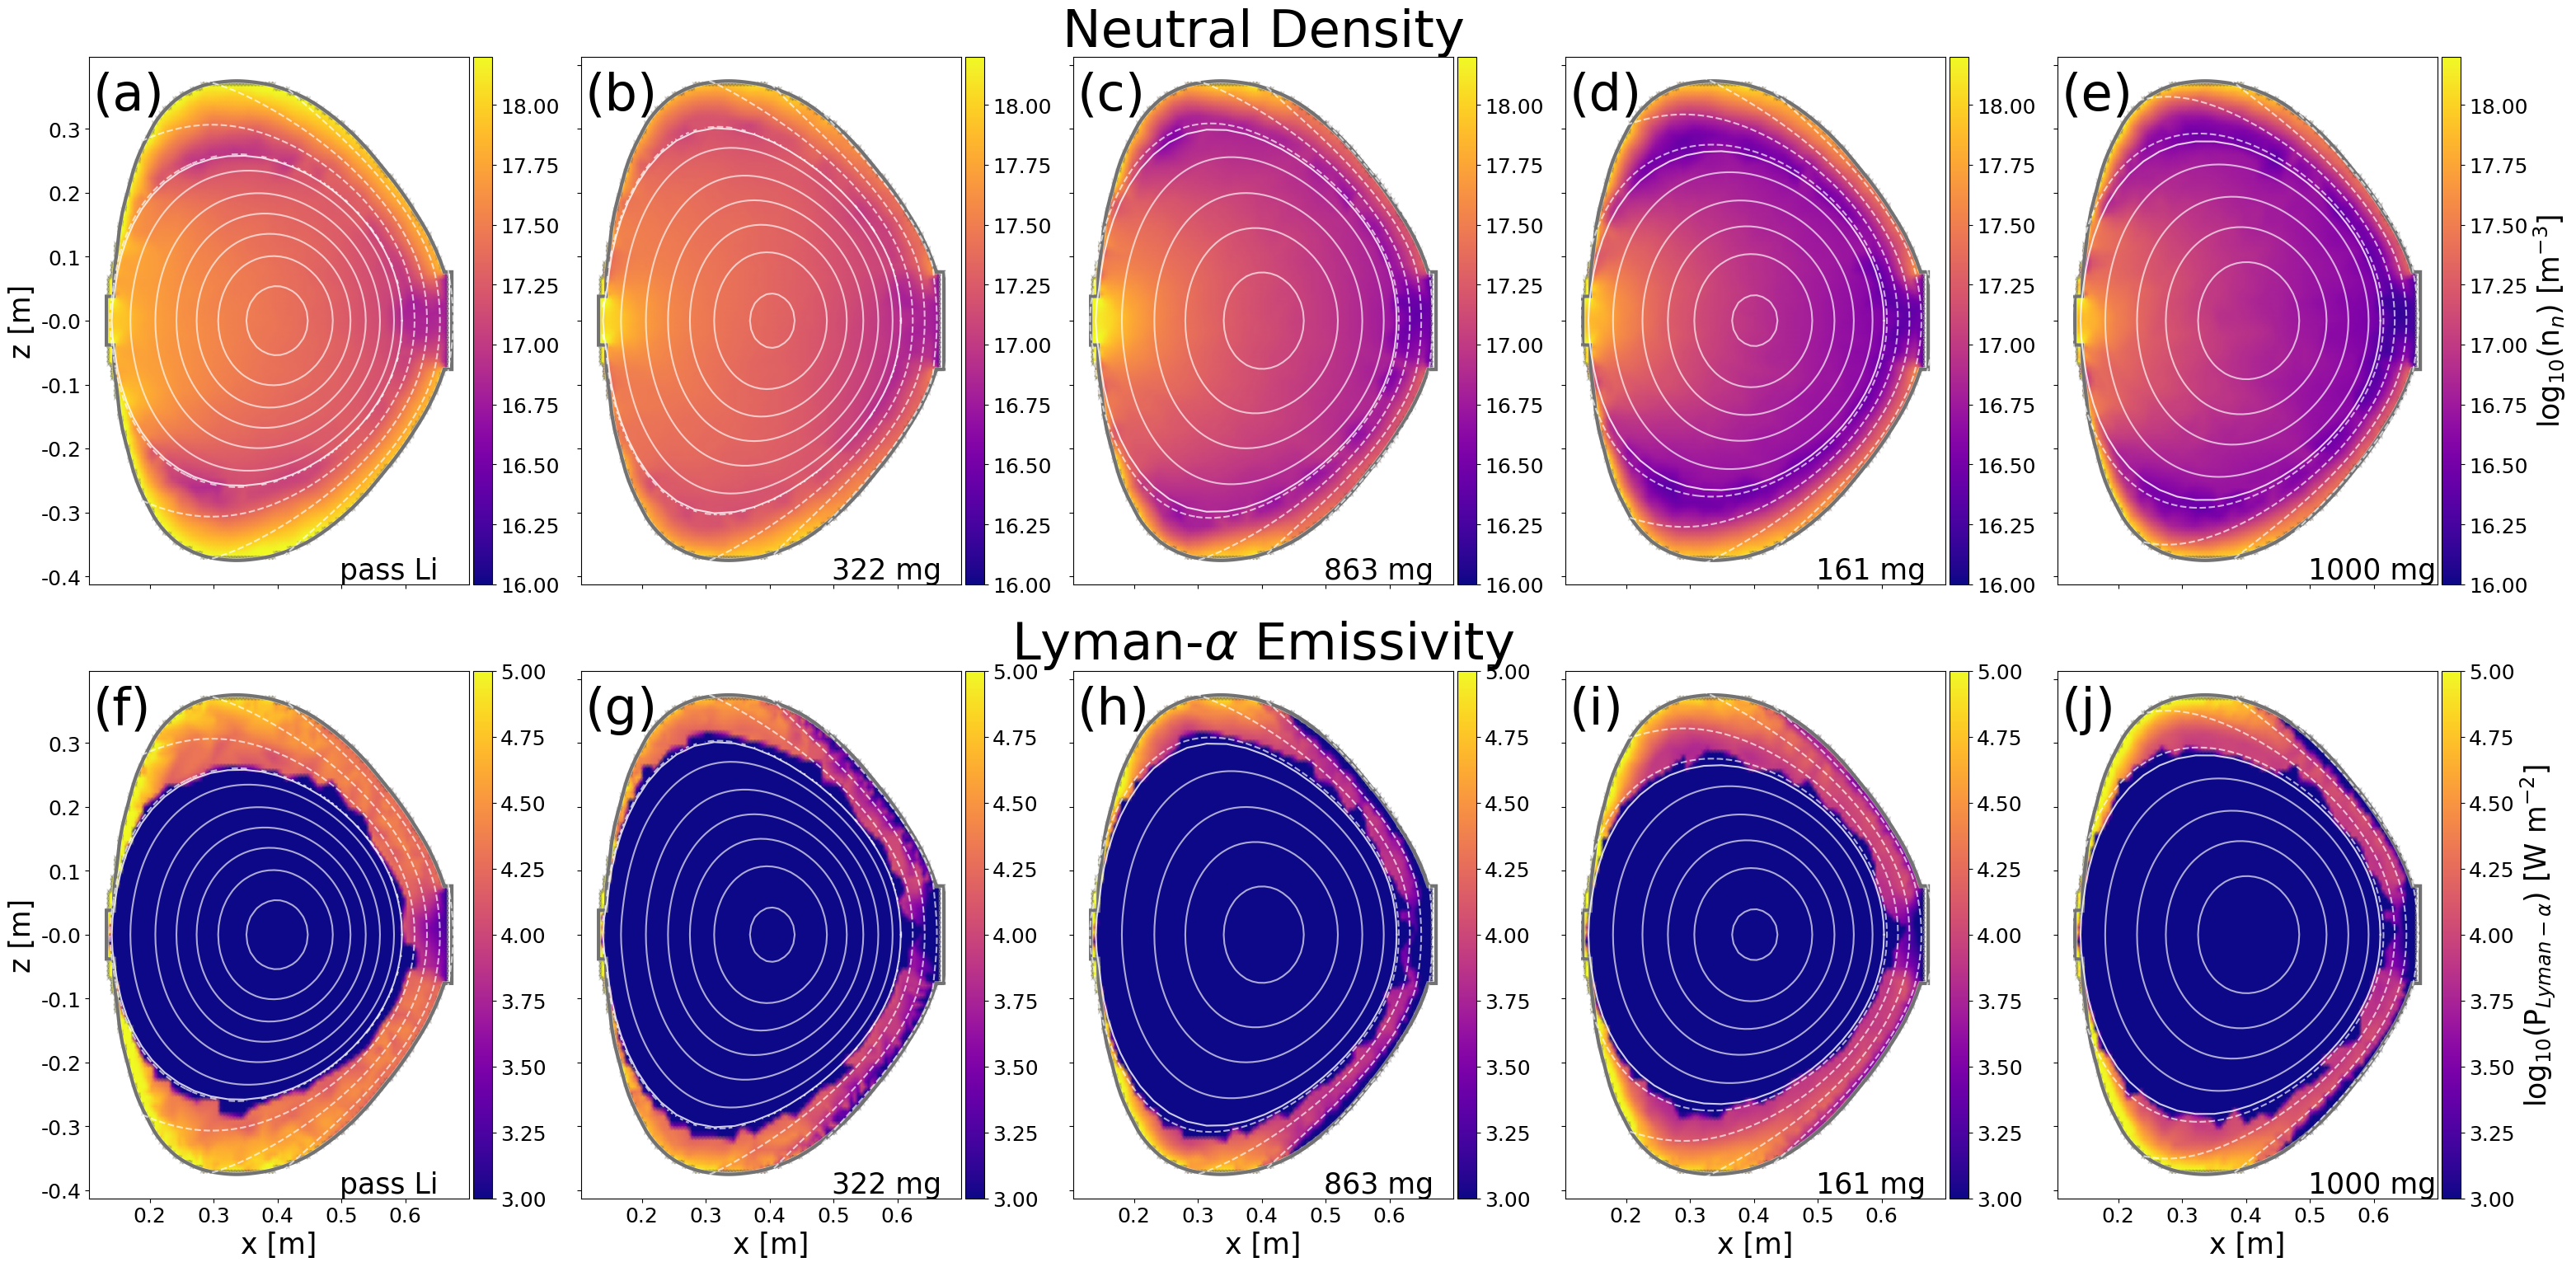

In [13]:
import plot_fns as plot
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,5,figsize=(30,15))
cbar = []
for raw,ax in zip(data,axs[0]):
    x, z, d, de, e, s, se = raw
    ax, bar = plot.make_2d_plot(fig,ax,x,z,np.log10(d),'linear',[16,18.2]) 
    cbar.append(bar)
for raw,ax in zip(data,axs[1]):
    x, z, d, de, e, s, se = raw
    ax, bar = plot.make_2d_plot(fig,ax,x,z,np.log10(e),'linear',[3,5])
    cbar.append(bar) 
fig.tight_layout()
# remove x tick labels for top row 
for ax in axs[0]:
    ax.set_xticklabels([])
# remove y tick labels for right column
for ax in axs[:,1:].flatten():
    ax.set_yticklabels([])
# add label to right most colorbar
cbar[4].set_label('log$_{10}$(n$_{n}$) [m$^{-3}$]',fontsize=25)
cbar[9].set_label('log$_{10}$(P$_{Lyman-\\alpha}$) [W m$^{-2}$]',fontsize=25)
# add x tick and x axis lable to bottom row
for ax in axs[1]:
    ax.set_xticks(np.arange(0.2,0.7,0.1))
    # make x tick labels 18
    ax.set_xticklabels(np.around(np.arange(0.2,0.7,0.1),decimals=1),fontsize=18)
    ax.set_xlabel('x [m]',fontsize=25)
# add y tick and y axis lable to left column
for ax in axs[:,0]:
    ax.set_yticks(np.arange(-0.4,0.4,0.1))
    # make y tick labels 18
    ax.set_yticklabels(np.around(np.arange(-0.4,0.4,0.1),decimals=1),fontsize=18)
    ax.set_ylabel('z [m]',fontsize=25)

fig_labels = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)']
plt_labl = ['pass Li','322 mg', '863 mg','161 mg','1000 mg']
row_title = ['Neutral Density',r'Lyman-$\alpha$ Emissivity']
# add row titles
for ax, title in zip(axs[:,2],row_title):
    ax.set_title(title,fontsize=45)
# add figure labels
for ax, labl in zip(axs.flatten(),fig_labels):
    ax.text(0.01,0.9,labl,transform=ax.transAxes,fontsize=45)
# add plot labels to each row
for ax, labl in zip(axs[0],plt_labl):
    ax.text(0.66,0.01,labl,transform=ax.transAxes,fontsize=25)
for ax, labl in zip(axs[1],plt_labl):
    ax.text(0.66,0.01,labl,transform=ax.transAxes,fontsize=25)
# increase cbar label size
for c in cbar:
    c.ax.tick_params(labelsize=18)
kin_recon = ['/u/amaan/kin_recon/TS917sm/run_3/LTX_103795_03.eqdsk',
             '/u/amaan/kin_recon/TS920fsm/run_3/LTX_103863_03.eqdsk',
             '/u/amaan/kin_recon/TS922sm-mod_valid/run_3/LTX_103955_03.eqdsk',
             '/p/ltxdata/reconstructions/eqdsk/TS105dsm/LTX_107581_468.eqdsk',
             '/u/amaan/TS107dsm/LTX_107656_468.eqdsk']
import read_eqdsk_ltx as recon 

for ax, recon_file in zip(axs[0],kin_recon):
    ax = recon.recon_plot_minimal(recon_file,ax)
    
for ax, recon_file in zip(axs[1],kin_recon):
    ax = recon.recon_plot_minimal(recon_file,ax)

# save figure
fig.savefig('degas_res.png',dpi=300,bbox_inches='tight')

## Edge parameters

In [77]:
kin_recon = ['/u/amaan/kin_recon/TS917sm/run_3/LTX_103795_03.eqdsk',
             '/u/amaan/kin_recon/TS920fsm/run_3/LTX_103863_03.eqdsk',
             '/u/amaan/kin_recon/TS922sm-mod_valid/run_3/LTX_103955_03.eqdsk',
             '/p/ltxdata/reconstructions/eqdsk/TS105dsm/LTX_107581_468.eqdsk',
             '/u/amaan/TS107dsm/LTX_107656_468.eqdsk']
import pandas as pd
import read_eqdsk_ltx as req
import neo_formulary as formula
import data_proc as process
import ltx_rw as read
from scipy import constants as k

cases = ['pli','322 mg','863 mg','161 mg','1000 mg']
tr_shots = shots = [1037950103,1038630103,1039550103,1075810103,1076560103]
nT = [[4e18,35],[4e18,35],[4e18,200],[4e18,100],[4e18,120]]
vals = ['n_lcfs','T_lcfs','q_a','L','lambda','coll_e','coll_i','nuste','nusti']
# create a dataframe with cases rows and vals columns
df = pd.DataFrame(index=cases,columns=vals)
# fill in the values
for i in range(len(cases)):
    df.loc[cases[i],'n_lcfs'] = nT[i][0]
    df.loc[cases[i],'T_lcfs'] = nT[i][1]
    q = max(req.read_eqdsk(kin_recon[i])['qpsi'])
    L = formula.conn_len(q)
    lmbda = formula.mfp_self(nT[i][1],nT[i][0])
    nuste = formula.collisionality(k.m_e,nT[i][0],nT[i][1],q,0.5)
    nusti = formula.collisionality(k.m_p,nT[i][0],nT[i][1],q,0.5)
    df.loc[cases[i],'q_a'] = q
    df.loc[cases[i],'L'] = L
    df.loc[cases[i],'lambda'] = lmbda
    df.loc[cases[i],'coll_e'] = nuste
    df.loc[cases[i],'coll_i'] = nusti
    nu,t,psi  = read.TRANSP_read_2D(tr_shots[i],'\TRANSP_LTX::TOP.OUTPUTS.TWO_D.NUSTE')
    idx = process.near(t,0.468)
    nuste = nu[idx][-1]
    nu,t,psi  = read.TRANSP_read_2D(tr_shots[i],'\TRANSP_LTX::TOP.OUTPUTS.TWO_D.NUSTI')
    idx = process.near(t,0.468)
    nusti = nu[idx][-1]
    df.loc[cases[i],'nuste'] = nuste
    df.loc[cases[i],'nusti'] = nusti
    
df

n_lcfs T_lcfs       q_a         L  lambda    coll_e  \
pli      4000000000000000000.0     35  4.066183  5.109717  3.0625  0.885391   
322 mg   4000000000000000000.0     35   4.73648  5.952036  3.0625  1.031344   
863 mg   4000000000000000000.0    200  4.437808  5.576714   100.0  0.035008   
161 mg   4000000000000000000.0    100  4.296143  5.398692    25.0  0.127224   
1000 mg  4000000000000000000.0    120  4.479004  5.628482    36.0  0.093698   

            coll_i     nuste     nusti  
pli      37.939296  0.028523  0.082803  
322 mg    44.19346   0.79101  0.352475  
863 mg    1.500115  0.026988  0.033945  
161 mg     5.45159  0.066918  0.050028  
1000 mg   4.015014  0.080354  0.056363

## Solving for absolute R using $\tau_p^*$ and relative recycling coeffecients from DEGAS2

assuming $\tau_p = CN_e$

we have three datasets for the constant fueling case that we know the following about:

| Case | Lithium | Peak Density [$m^{-3}$]  | $\bar\tau_p^*$ [$ msec$]| DEGAS2 relative R - upper bound | DEGAS2 relative R - lower bound |
| --- | --- | --- | --- | --- | --- |
| 1 | Old | 8.4e18 | 3.6 | 1.05 | 0.95 |
| 2 | 322 | 8.0e18 | 2.8 | 1.0 | 0.9 |
| 3 | 863 | 5.4e18 | 1.1 | 0.75 | 0.65 |
| 4 | 161 | 9.337e18 | 2.4 | 0.75 | 0.65 |
| 5 | 1000 | 9e18 | 1.1 | 0.7 | 0.6 |

This information can be summarized in a set of 5 linear equations


\begin{align}
\frac{1}{C} - \frac{R_1}{C} &= \frac{N_{e,1}}{\bar\tau_{p,1}^*}\\
\frac{1}{C} - \frac{R_2}{C} &= \frac{N_{e,2}}{\bar\tau_{p,2}^*}\\
\frac{1}{C} - \frac{R_3}{C} &= \frac{N_{e,3}}{\bar\tau_{p,3}^*}\\
\frac{1}{C} - \frac{R_3}{C} &= \frac{N_{e,3}}{\bar\tau_{p,3}^*}\\
\frac{1}{C} - \frac{R_4}{C} &= \frac{N_{e,4}}{\bar\tau_{p,4}^*}\\
0.7 R_1 - R_3 = 0\\
0.95 R_1 - R_2 = 0\\
0.7 R_1 - R_4 = 0\\
0.65 R_1 - R_5 = 0
\end{align}

Feeding in known values of density and $\bar\tau_p^*$

\begin{align}
R_1 + C 3e18 &= 1\\
R_2 + C 3.47e18 &= 1\\
R_3 + C 4.9e18 &= 1\\
R_4 + C 3.73e18 &= 1\\
R_5 + C 7.5e18 &= 1\\
0.95 R_1 - R_2 = 0\\
0.7 R_1 - R_3 = 0\\
0.7 R_1 - R_4 = 0\\
0.65 R_1 - R_5 = 0
\end{align}


\begin{equation}
 \begin{bmatrix} 
 3e18       &   1   &   0   &   0   &   0   &   0\\
 3.47e18    &   0   &   1   &   0   &   0   &   0\\
 4.9e18     &   0   &   0   &   1   &   0   &   0\\
 3.73e18    &   0   &   0   &   0   &   1   &   0\\
 7.5e18       &   0   &   0   &   0   &   0   &   1\\
 0          &   0.95&   -1  &   0   &   0   &   0\\
 0          &   0.7 &   0   &   -1  &   0   &   0\\
 0          &   0.7 &   0   &   0   &   -1  &   0\\
 0          &   0.65&   0   &   0   &   0   &   -1 

 \end{bmatrix} 
 \begin{bmatrix} 
 C \\ 
 R1 \\ 
 R2 \\ 
 R3 \\
 R4 \\
 R5
 \end{bmatrix} = 
 \begin{bmatrix} 
 1 \\ 
 1 \\ 
 1 \\
 1 \\
 1 \\
 0 \\
 0 \\ 
 0 \\
 0
 \end{bmatrix} 
\end{equation}

Or in matrix form 

\begin{equation}
Ax = b
\end{equation}

## upperbound

In [19]:
import numpy as np
import pandas as pd

ne = np.array([8.4e18,8.0e18,5.4e18,9.337e18,9e18])
tps = np.array([3.2,2.8,1.1,2.4,1.1])
rat = ne/tps
A = np.array([[rat[0] , 1, 0, 0, 0, 0],
              [rat[1], 0, 1, 0, 0, 0],
              [rat[2], 0, 0, 1 ,0, 0],
              [rat[3], 0, 0, 0, 1, 0],
              [rat[4], 0, 0, 0, 0, 1],
              [0, 1.0, -1, 0, 0 ,0],
              [0, 0.75, 0, -1, 0, 0],
              [0, 0.75, 0, 0, -1, 0],
              [0, 0.7, 0, 0, 0, -1]])
k = np.array([[1],[1],[1],[1],[1],[0],[0],[0],[0]])
B = np.dot(A.T,A)
c = np.dot(A.T,k)
pd.DataFrame(np.linalg.inv(B))
np.linalg.lstsq(A,k,rcond=1e-25)

(array([[1.85295437e-19],
        [8.83969907e-01],
        [8.63650781e-01],
        [6.96896363e-01],
        [7.24825315e-01],
        [5.85068881e-01]]),
 array([0.01382869]),
 6,
 array([1.10104748e+19, 2.13730373e+00, 1.41421356e+00, 1.41421356e+00,
        1.37115732e+00, 4.08485438e-01]))

## Lower bound

In [20]:
import numpy as np
import pandas as pd
A = np.array([[rat[0] , 1, 0, 0, 0, 0],
              [rat[1], 0, 1, 0, 0, 0],
              [rat[2], 0, 0, 1 ,0, 0],
              [rat[3], 0, 0, 0, 1, 0],
              [rat[4], 0, 0, 0, 0, 1],
              [0, 0.9, -1, 0, 0 ,0],
              [0, 0.65, 0, -1, 0, 0],
              [0, 0.65, 0, 0, -1, 0],
              [0, 0.6, 0, 0, 0, -1]])
k = np.array([[1],[1],[1],[1],[1],[0],[0],[0],[0]])
B = np.dot(A.T,A)
c = np.dot(A.T,k)
pd.DataFrame(np.dot(np.linalg.inv(B),c))

0
0  6.993952e-20
1  8.741225e-01
2  7.934415e-01
3  6.124201e-01
4  6.480429e-01
5  4.761205e-01

## gkeyll  

(-0.5, 699.5, 665.5, -0.5)

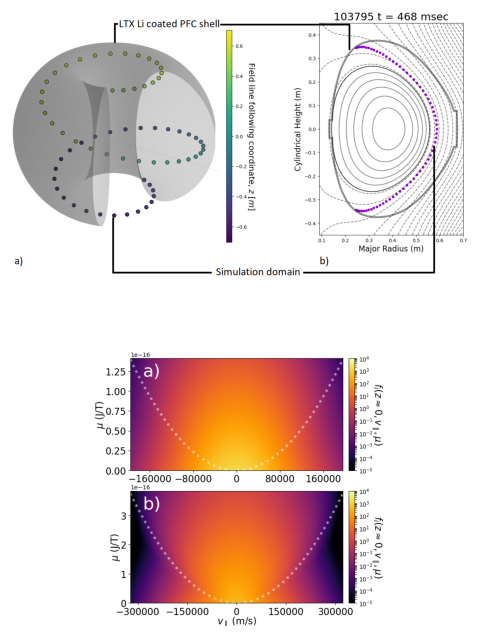

In [82]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

geom = mpimg.imread('ltx_gk_geom_annotated.png')
distb = mpimg.imread('distFion_z0eq0p0.png')

fig, axs = plt.subplots(2,1,figsize=(6,8))
axs[0].imshow(geom)
axs[0].axis('off')
axs[1].imshow(distb)
axs[1].axis('off')

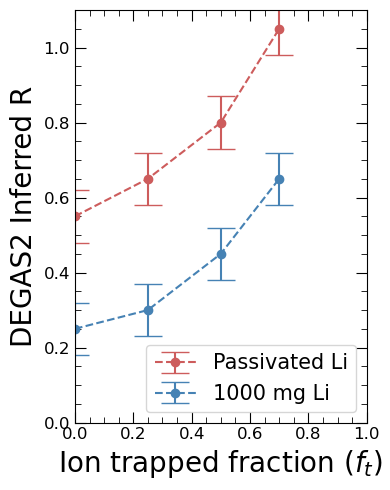

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,5))
import plot_fns as plot

pli = [0.55,0.65,0.8,1.05]
mg_1000 = [0.25,0.3,0.45,0.65]
ft = [0,0.25,0.5,0.7] 
# plot with dashed line and point, ft is x axis
# add error bar of 0.1 on all y values
ax.errorbar(ft,pli,yerr=0.07,fmt='o',capsize=10,color='indianred',label='Passivated Li',linestyle='--')
ax.errorbar(ft,mg_1000,yerr=0.07,fmt='o',capsize=10,color='steelblue',label='1000 mg Li',linestyle='--')
ax.set_xlabel(r'Ion trapped fraction ($f_t$)',fontsize=20)
ax.set_ylabel('DEGAS2 Inferred R',fontsize=20)
# lim 0-1 for both axes
ax.set_xlim(0,1)
ax.set_ylim(0,1.1)
plot.add_minor_ticks(ax)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
ax.legend(loc='best',prop=dict(size=15))
fig.savefig('degas2_inferred_R.png',dpi=300,bbox_inches='tight')

## axial residence time in mirror   


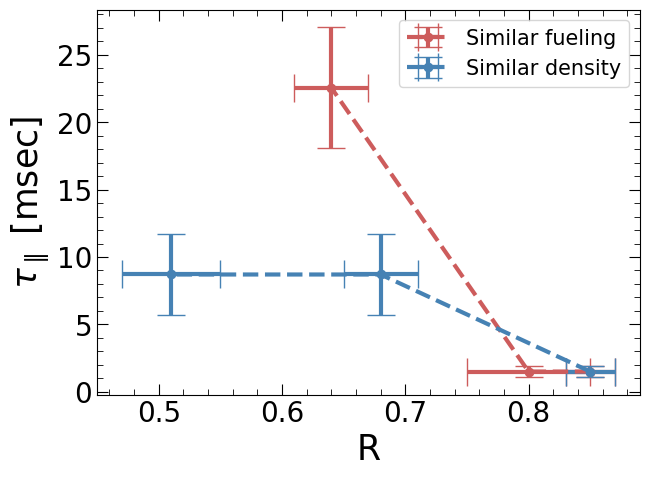

In [34]:
n_f = [2e18,2e18,2e18]
t_f = [10,10,75]
n_d = [2e18,2e18,2e18]
t_d = [10,33,33]
import neo_formulary as formula
from scipy import constants as k
import numpy as np
lb_f = []
for n,t in zip(n_f,t_f):
    lb_f.append(formula.coll_time_ii(t,n,1,k.m_p)*np.log(4)*1000)
lb_d = []
for n,t in zip(n_d,t_d):
    lb_d.append(formula.coll_time_ii(t,n,1,k.m_p)*np.log(4)*1000)
    
t_f = [15,15,100]
t_d = [15,55,55]

ub_f = []
for n,t in zip(n_f,t_f):
    ub_f.append(formula.coll_time_ii(t,n,1,k.m_p)*np.log(4)*1000)
ub_d = []
for n,t in zip(n_d,t_d):
    ub_d.append(formula.coll_time_ii(t,n,1,k.m_p)*np.log(4)*1000)
    
# combine lb and ub for the two cases into mean and error
# const f 
f = [(i+j)/2 for i,j in zip(lb_f,ub_f)]
fe = [(j-i)/2 for i,j in zip(lb_f,ub_f)]
# const d
d = [(i+j)/2 for i,j in zip(lb_d,ub_d)]
de = [(j-i)/2 for i,j in zip(lb_d,ub_d)]

R_f = [0.85,0.8,0.64]
R_fe = [0.02,0.05,0.03]

R_d = [0.85,0.68,0.51]
R_de = [0.02,0.03,0.04]

import matplotlib.pyplot as plt
import plot_fns as plot

fig, axs = plt.subplots(1,1,figsize=(7,5))
# plot with dashed line and point, R is x axis, red is const f, blue is const d, first point is in both colors

axs.errorbar(R_f,f,xerr=R_fe,yerr=fe,fmt='o',capsize=10,color='indianred',label='Similar fueling',linestyle='--',linewidth=3)
axs.errorbar(R_d,d,xerr=R_de,yerr=de,fmt='o',capsize=10,color='steelblue',label='Similar density',linestyle='--',linewidth=3)
plot.add_minor_ticks(axs)
plot.standard_ax(axs,'R',r'$\tau_{\parallel}$ [msec]')
# add legend
axs.legend(loc='best',prop=dict(size=15))

# save figure
fig.savefig('tau_parallel.png',dpi=300,bbox_inches='tight')


{'R': [40.0, 43.0, 46.0, 49.0, 52.0, 54.0, 56.0, 58.0, 59.0, 60.0, 62.0], 'Z': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'N_E': [2.2482906034842374e+19, 2.8978666960373494e+19, 2.424050146540836e+19, 2.3728806214889333e+19, 1.4299442292591292e+19, 1.4191425237926445e+19, 9.52126304972947e+18, 5.145362017362945e+18, 2.705461130474634e+18, 2.207972324317746e+18, 3.0771835091888143e+18], 'NE_ERR': [2.0419852572706458e+18, 3.282359310011598e+18, 2.3035470791770353e+18, 2.0787999264358298e+18, 1.3071206936658253e+18, 1.1462062369291644e+18, 9.583183416564512e+17, 7.741196289749697e+17, 6.315693059670653e+17, 8.21131068009179e+17, 1.4584469267402345e+18], 'TE': [175.65037328311254, 255.08309289281803, 240.2320335402549, 226.33896886755218, 156.32602989420553, 102.48870657221428, 76.2759730287646, 68.14694726904324, 94.82061422497968, 344.3797733952346, 368.779369455068], 'TE_ERR': [13.524070200867326, 17.358396854253556, 15.411097028851694, 13.964595985603879, 12.6020032202054

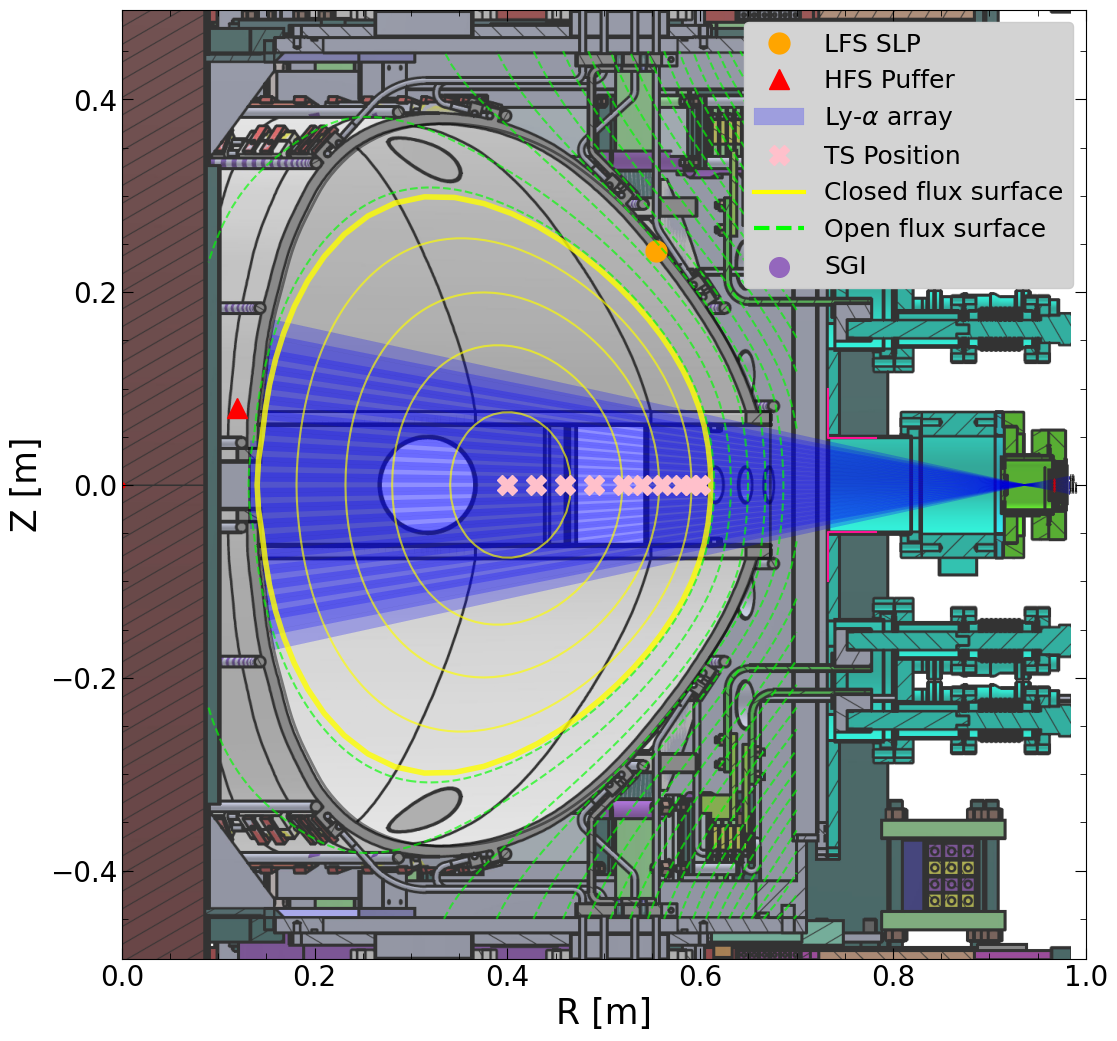

In [22]:
# import pol_CS.png and display

import ltx_disp as display
import matplotlib.pyplot as plt
import read_eqdsk_ltx as recon
import util_degas2 as util
import numpy as np
import plot_fns as plot
import matplotlib.patches as mpatches

def poloidal_cad_cs_pop(fig, ax, cs_path='/u/amaan/main/LTX-beta/pub_plots/pop2023/pol_CS.png'):
    """ Summary: Shows the poloidal cross section of ltx-beta at bay -N-O 

    Args:
        fig (figure): matplotlib figure object
        ax (axis): matplotlib axis object
        cs_path (str, optional): location of the image to be used . Defaults to '/u/amaan/main/LTX-beta/pub_plots/pop2023/pol_CS.png'.

    Returns:
        ax : matplotlib axis object 
    """
    
    #! y - axis span of cross section is 1238 pixels which is equal to 984.12 mm
    #! the distance per pixel is therefore 984.12/1238 = 0.795 mm/pixel
    #! convert x and y axis to mm from pixels image size is 1244,1238 and center the image vertically
    ax_span = [-6*0.795,2*622*0.795-6*0.795,-984.12/2+0.795,984.12/2+0.795]
    # convert from mm to m
    ax_span = [i/1000 for i in ax_span]
    # make image translucent
    
    #ax.imshow(plt.imread(cs_path),extent = ax_span)
    ax.imshow(plt.imread(cs_path),extent = ax_span,alpha=0.8)
    ax.scatter(0,0,marker='.',color='r',s=50)
    return fig, ax

fig, ax = plt.subplots(figsize=(1244/100,1238/100))
fig,ax = poloidal_cad_cs_pop(fig,ax)
ax = recon.ins_in_equilib(554/1000,243/1000,ax,shape='o',color='orange',size=15,l='LFS SLP')
ax = recon.ins_in_equilib(0.12,0.08,ax,shape='^',color='red',size=15,l='HFS Puffer')
ax = display.disp_pol_array_eqlib_no_inset(ax,[])
ax = recon.recon_plot_minimal('/u/amaan/kin_recon/TS922sm-mod_valid/run_3/LTX_103955_03.eqdsk',ax)
TS = util.get_TS_json('TS91768sm.json')
r = np.array(TS['R'])/100
ax = recon.ins_in_equilib(r[:-1],np.zeros(np.shape(r))[:-1],ax,shape='X',color='pink',size=15,l='TS Position') 
plot.standard_ax(ax,'R [m]','Z [m]')
plot.add_minor_ticks(ax)

# add yellow line to legend with label 'Closed flux surface'
ax.plot([],[],color='yellow',label='Closed flux surface',linewidth=3)
# add green dashed line to legend with label 'Open flux surface'
ax.plot([],[],color='lime',label='Open flux surface',linestyle='--',linewidth=3)
# add a big dot to legend with label 'SGI'
ax.scatter([],[],marker='o',color='tab:purple',s=200,label='SGI')

# add legend, legend background is white
ax.legend(loc='upper right',prop=dict(size=18),framealpha=1,facecolor='lightgrey')
# save figure
fig.savefig('pol_CS_plasma.png',dpi=300,bbox_inches='tight')

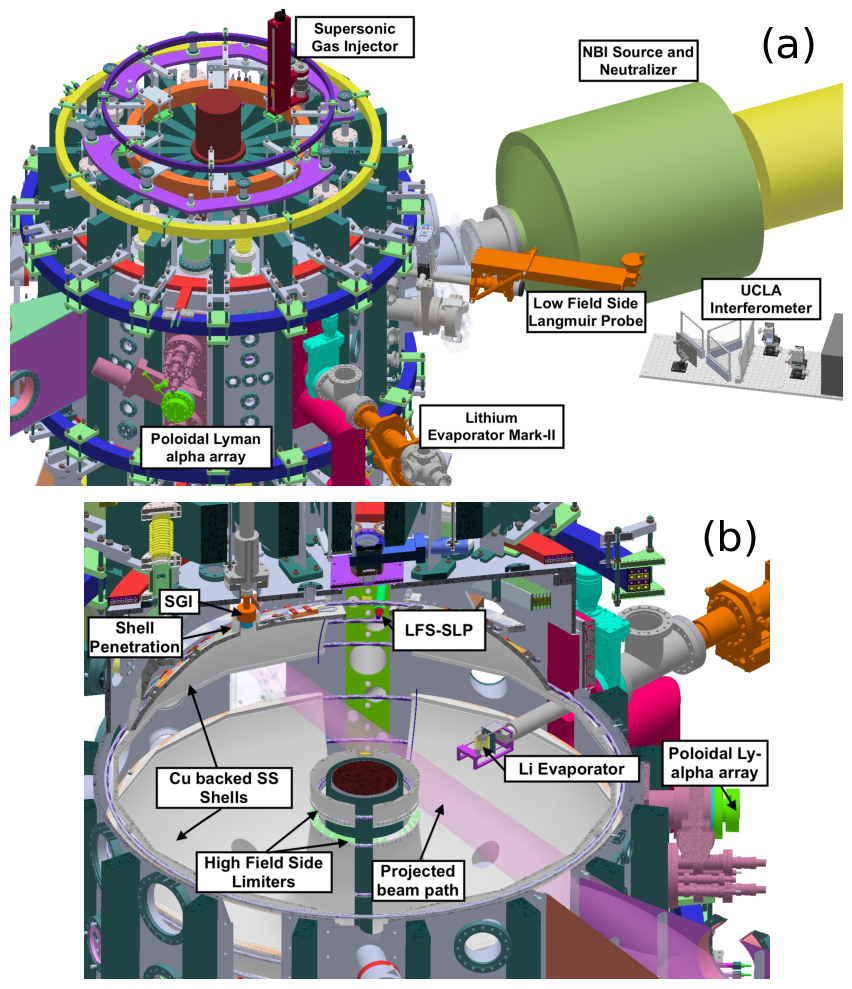

In [34]:
# read three image files and display them in a column and call them (a), (b), (c)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

fig, axs = plt.subplots(2,1,figsize=(10,10))
# read images
img1 = mpimg.imread('A_annotated_Everything.png')
img2 = mpimg.imread('B_annotated_Everything_internal4.png')
#img3 = mpimg.imread('C_annotated_pol_CS_plasma.png')

# display images
axs[0].imshow(img1)
axs[1].imshow(img2)
#axs[2].imshow(img3)

# remove axis ticks and labels
for ax in axs:
    ax.axis('off')

# add labels
fig_labels = ['(a)','(b)']
for ax, l in zip(axs,fig_labels):
    ax.text(0.9,0.9,l,transform=ax.transAxes,fontsize=30)

# tight layout
fig.tight_layout()

# save figure 
fig.savefig('A_B.png',dpi=300,bbox_inches='tight')

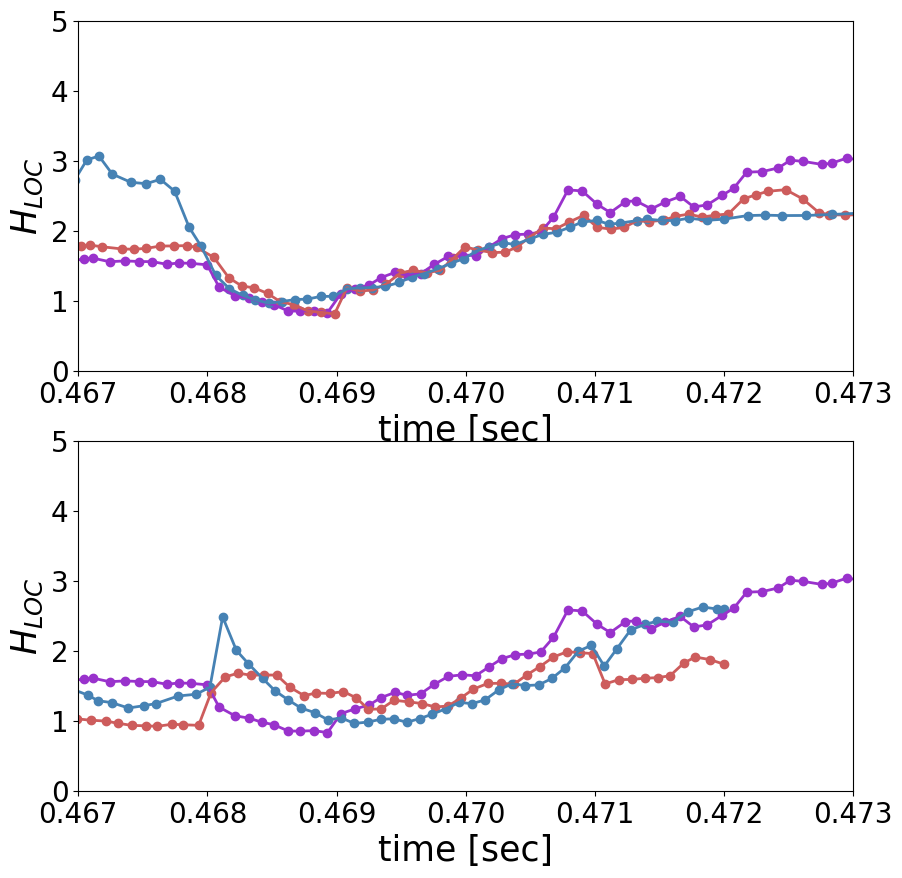

In [3]:
datasets = [['pli',322,863],['pli',161,1000]]
shotlist = [[1037950103,1038630103,1039550103] , [1037950103,1075810103,1076560103]] 
colors = ['darkorchid','indianred','steelblue']
plt_labels = [['Passivated Li', '322 mg', '863 mg'],
              ['Passivated Li', '161 mg', '1000 mg']]
span_list = [ [ [0.471,0.472],[0.471,0.472],[0.471,0.472] ] , [ [0.471,0.472],[0.471,0.472],[0.471,0.472] ] ]

import matplotlib.pyplot as plt
import ltx_rw as rw
import plot_fns as pf
import data_proc as process
import numpy as np
fig, axs = plt.subplots(2,1,figsize=(10,10))
pl_span = [0.467,0.473]
avg_conf = []
avg_loc = []

for ax,p_l,shots,spans in zip(axs,plt_labels,shotlist,span_list):
    for l,shot,c,span in zip(p_l,shots,colors,spans):
        t = rw.TRANSP_read_1D(shot,'\TIME1D')[0]
        t_in = rw.TRANSP_read_1D(shot,'\TRANSP_LTX::TOP.TRDATA.SIGNALS1D:TIME1D')[0]
        lid = np.array(rw.TRANSP_read_1D(shot,'\TRANSP_LTX::TOP.TRDATA.SIGNALS1D:LID')[0])
        rmajblim = np.array(rw.TRANSP_read_1D(shot,'\RMAJBLIM')[0])
        raxis = np.array(rw.TRANSP_read_1D(shot,'\RAXIS')[0])
        rboun = rw.TRANSP_read_2D(shot,'\\RBOUN')[0]
        rbound = np.array([r[-1] for r in rboun])
        q_prof = rw.TRANSP_read_2D(shot,'\\Q')[0]
        q = np.array([p[-1] for p in q_prof])
        # t_in is the time basis for lid, interpolate lid to t, divide by RMAJ extent of the boundary
        neav = np.interp(t,t_in,lid)/rmajblim
        loc = 7.1e-22*neav*(raxis**2.04)*(rbound**1.04)*(q**0.5)*1000
        pcur = np.array(rw.TRANSP_read_1D(shot,'\PCUR')[0])
        bt = np.array(rw.TRANSP_read_1D(shot,'\BZ')[0])
        pabs = np.array(rw.TRANSP_read_1D(shot,'\POHT')[0])
        kap = np.array(rw.TRANSP_read_2D(shot,'\ELONG')[0])
        kappa = np.array([k[-1] for k in kap])
        
        tau,t = rw.TRANSP_read_1D(shot,'\TAUA1')
        tau_e = tau*1000
        #tau_e_f = process.filter(tau_e,t,window=21,order=3)
        tau_e_f = tau_e
        # interpolate tau_e to match ne
        ax = pf.scat1d_ax(ax,t,tau_e/loc,'time [sec]',r'$H_{LOC}$',pl_span,[0,5],c,l)
        ax = pf.plot1d_ax(ax,t,tau_e_f/loc,'time [sec]',r'$H_{LOC}$',pl_span,[0,5],c,'')
        # take average and standard error of tau_e over the span 
        tau_e_avg = np.mean(tau_e_f[(t>span[0]) & (t<span[1])])
        tau_e_sem = np.std(tau_e_f[(t> 0.4678 ) & (t< 0.472 )])
        loc_avg = np.mean(loc[(t>span[0]) & (t<span[1])])
        loc_sem = np.std(loc[(t> span[0]) & (t< span[1])])
        avg_loc.append([loc_avg,loc_sem])
        avg_conf.append([tau_e_avg,tau_e_sem])
        #pf.plot1d_ax(ax,t,globus,'time [sec]',r'$\tau_{E,LOC}$ [msec]',c=c,l=l,xlim=pl_span)

In [1]:
fig, axs = plt.subplots(2,1,figsize=(10,15))
avg_conf_f = avg_conf[:3]
avg_conf_d = avg_conf[3:]
H_loc = [i[0]/j[0] for i,j in zip(avg_conf,avg_loc)]

H_loc_e = [np.sqrt((i[1])**2+(j[1])**2) for i,j in zip(avg_conf,avg_loc)]
#H_loc_e = [j[1] for i,j in zip(avg_conf,avg_loc)]

H_loc_f = H_loc[:3]
H_loc_fe = H_loc_e[:3]
H_loc_d = H_loc[3:]
H_loc_de = H_loc_e[3:]

li_f = ['passLi', '363 mg', '863 mg']
li_d = ['passLi', '161 mg', '1000 mg']
tps_f = [3.6,2.8,1.1]
tps_fe = [0.1,0.1,0.1]
tps_d = [3.6,2.4,1.1]
tps_de = [0.1,0.1,0.1]
t = [0,1,2]



pf.scat1d_ebar_ax(axs[0],t,[i[0] for i in avg_conf_f],[i[1] for i in avg_conf_f],'Lithium deposition (mg)','Confinement time [msec]',
                  [-0.1,2.1],[0,4],'indianred',r'$\tau_{E,TRANSP}$',15)
# joins the points with a line
axs[0].plot(t,[i[0] for i in avg_conf_f],c='indianred',linestyle='--',linewidth=5)
pf.scat1d_ebar_ax(axs[0],t,tps_f,tps_fe,'Lithium deposition (mg)','Confinement time [msec]',
                    [-0.1,2.1],[0,4],'steelblue',r'$\tau_{p}^*$',15)
pf.scat1d_ebar_ax(axs[0],t,H_loc_f,H_loc_fe,'Lithium deposition (mg)','Confinement time [msec]',
                    [-0.1,2.1],[0,4],'forestgreen',r'$H_{LOC}$',15)
# join with dashed line
axs[0].plot(t,H_loc_f,c='forestgreen',linestyle='--',linewidth=5)

axs[0].plot(t,tps_f,c='steelblue',linestyle='--',linewidth=5)
# force xtick labels to be li_f
axs[0].set_xticks(t)
axs[0].set_xticklabels(li_f)
# add minor ticks
pf.add_minor_ticks(axs[0])
# place legend 
axs[0].legend(loc='upper right',fontsize=20)

# repeat for density
pf.scat1d_ebar_ax(axs[1],t,[i[0] for i in avg_conf_d],[i[1] for i in avg_conf_d],'Lithium deposition (mg)','Confinement time [msec]',
                    [-0.1,2.1],[0,4],'indianred',r'$\tau_{E,TRANSP}$',15)
axs[1].plot(t,[i[0] for i in avg_conf_d],c='indianred',linestyle='--',linewidth=5)
pf.scat1d_ebar_ax(axs[1],t,tps_d,tps_de,'Lithium deposition (mg)','Confinement time [msec]',
                    [-0.1,2.1],[0,4],'steelblue',r'$\tau_{p}^*$',15)
#pf.scat1d_ebar_ax(axs[1],t,H_loc_d,H_loc_de,'Lithium deposition (mg)','Confinement time [msec]',
                    #[-0.1,2.1],[0,4],'forestgreen',r'$H_{LOC}$',15)
axs[1].plot(t,H_loc_d,c='forestgreen',linestyle='--',linewidth=5)
axs[1].plot(t,tps_d,c='steelblue',linestyle='--',linewidth=5)
# force xtick labels to be li_d
axs[1].set_xticks(t)
axs[1].set_xticklabels(li_d)
# add minor ticks
pf.add_minor_ticks(axs[1])
# place legend
axs[1].legend(loc='upper right',fontsize=20)
fig.tight_layout()
# add a) and b)
fig.text(0.05,0.05,'(a)',transform=axs[0].transAxes,fontsize=30)
fig.text(0.05,0.05,'(b)',transform=axs[1].transAxes,fontsize=30)
    
# save the figure

fig.savefig('tau_LOC_comp.png',dpi=300,bbox_inches='tight')

IndentationError: unexpected indent (1317084243.py, line 51)

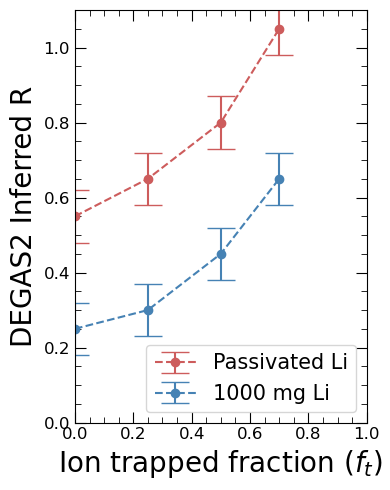

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,5))
import plot_fns as plot

pli = [0.55,0.65,0.8,1.05]
mg_1000 = [0.25,0.3,0.45,0.65]
ft = [0,0.25,0.5,0.7]

# plot with dashed line and point, ft is x axis
# add error bar of 0.1 on all y values
ax.errorbar(ft,pli,yerr=0.07,fmt='o',capsize=10,color='indianred',label='Passivated Li',linestyle='--')
ax.errorbar(ft,mg_1000,yerr=0.07,fmt='o',capsize=10,color='steelblue',label='1000 mg Li',linestyle='--')
ax.set_xlabel(r'Ion trapped fraction ($f_t$)',fontsize=20)
ax.set_ylabel('DEGAS2 Inferred R',fontsize=20)
# lim 0-1 for both axes
ax.set_xlim(0,1)
ax.set_ylim(0,1.1)
plot.add_minor_ticks(ax)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()
ax.legend(loc='best',prop=dict(size=15))
fig.savefig('inferred_R.png',dpi=300,bbox_inches='tight')

/tmp/ipykernel_2643/284101233.py:8: RuntimeWarning: divide by zero encountered in divide
  y = (1+x)/(1-x)


(0.0, 5.0)

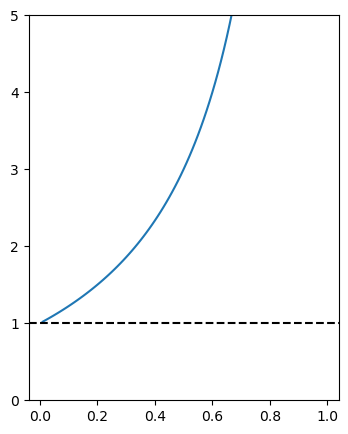

In [6]:
# plot y = 1+x/1-x

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(4,5))
x = np.linspace(0.01,1,100)
y = (1+x)/(1-x)
ax.plot(x,y)
# set dashed line at y = 1
ax.axhline(1,linestyle='--',color='k')
# set ylim to 0-5
ax.set_ylim(0,5)